In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data-1681267612252.csv')

In [50]:
spm =pd.read_csv('compiledata_edit.csv')

In [51]:
spm['Timestamp'] = pd.to_datetime(spm['Timestamp'])

In [52]:
dates_to_keep = ['2022-12-02','2022-12-04','2022-12-05','2022-12-06','2022-12-07','2022-12-17','2022-12-21','2022-12-24','2022-12-27','2022-12-30','2023-01-02','2023-01-05','2023-01-08','2023-01-10']
dates_to_keep = pd.to_datetime(dates_to_keep)

In [53]:
spm_df = spm[spm['Timestamp'].dt.date.isin(dates_to_keep.date)]

In [54]:
spm_df

Timestamp  AMB_Temp (deg C)  AMB_Humidity (%)  \
0    2022-12-02 00:00:00          25.28338          55.51705   
1    2022-12-02 00:10:00          25.28338          55.51705   
2    2022-12-02 00:20:00          25.28338          55.51705   
3    2022-12-02 00:00:00          25.28338          55.51705   
4    2022-12-02 00:40:00          25.28338          55.51705   
...                  ...               ...               ...   
5753 2023-01-10 23:10:00          26.74916          55.43732   
5754 2023-01-10 23:20:00          26.74916          55.28853   
5755 2023-01-10 23:30:00          26.74916          55.28853   
5756 2023-01-10 23:40:00          26.74916          55.28853   
5757 2023-01-10 23:50:00          26.74916          55.28853   

      BTU Main (tons refr)  BTU Main Flow (cu meter/h)  \
0                    227.2                         360   
1                    227.2                         360   
2                    227.2                         360   
3                    227.2                         360   
4                    227.2                         360   
...                    ...                         ...   
5753                 312.4                         360   
5754                 284.0                         360   
5755                 284.0                         360   
5756                 340.8                         396   
5757                 284.0                         360   

      BTU Main Return Temp (deg C)  BTU Main Supply Temp (deg C)  \
0                            10.67                      8.580000   
1                            10.67                      8.580000   
2                            10.67                      8.580000   
3                            10.67                      8.580000   
4                            10.67                      8.580000   
...                            ...                           ...   
5753                         11.39                      8.590000   
5754                         11.25                      8.679999   
5755                         11.13                      8.639999   
5756                         11.11                      8.440000   
5757                         11.11                      8.500000   

      Building Efficiency (%)  Total Building Load (RT)  \
0                    1.051942                     312.4   
1                    1.051942                     312.4   
2                    1.051942                     312.4   
3                    1.051942                     312.4   
4                    1.051942                     312.4   
...                       ...                       ...   
5753                 0.916430                     397.6   
5754                 0.874410                     397.6   
5755                 0.980454                     369.2   
5756                 0.957042                     397.6   
5757                 0.871142                     426.0   

      CH1 ENTERING COND WATER TEMP (deg C)  \
0                                 25.72223   
1                                 25.72223   
2                                 25.72223   
3                                 25.72223   
4                                 25.72223   
...                                    ...   
5753                              26.50000   
5754                              26.33333   
5755                              26.38889   
5756                              26.55556   
5757                              26.38889   

      CH1 LEAVING COND WATER TEMP (deg C)  CH1 ENTERING CHW TEMP (deg C)  \
0                                29.27778                       10.50000   
1                                29.27778                       10.50000   
2                                29.27778                       10.50000   
3                                29.27778                       10.50000   
4                                29.27778                       10.50000   
...           

In [3]:
from datetime import timedelta

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [5]:
df.dtypes

datetime                datetime64[ns]
hdr_chw_supptemp               float64
hdr_chw_rettemp                float64
hdr_chw_flow                   float64
hdr_hgain                      float64
                             ...      
ch5_cdw_supptemp_hli           float64
ch5_cdw_rettemp_hli            float64
ch5_chw_supptemp_hli           float64
ch5_chw_rettemp_hli            float64
sys_eff                        float64
Length: 120, dtype: object

In [6]:
df_sp = df[(df['datetime'] > '2023-03-02') & (df['datetime'] < '2023-03-31')] 
df_sp.reset_index( inplace = True)

del df_sp['index']

In [8]:
df_sp

datetime  hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
0     2023-03-02 00:00:30         11.340000        14.799999    110.000088   
1     2023-03-02 00:01:00         11.380000        14.950000    100.000080   
2     2023-03-02 00:01:30         11.530000        14.950000    100.000080   
3     2023-03-02 00:02:00         11.530000        14.950000    100.000080   
4     2023-03-02 00:02:30         11.509999        15.000000    100.000080   
...                   ...               ...              ...           ...   
83036 2023-03-30 23:57:30          8.210000        10.860000    110.000088   
83037 2023-03-30 23:58:00          8.190000        10.770000    110.000088   
83038 2023-03-30 23:58:30          8.190000        10.770000    110.000088   
83039 2023-03-30 23:59:00          8.190000        10.770000    110.000088   
83040 2023-03-30 23:59:30          8.200000        10.860000    110.000088   

       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp       oa_t      oa_rh  \
0      568.00000         29.685112        34.584270  23.970888  53.301865   
1      596.40000         29.528143        34.584270  23.970888  53.301865   
2      568.00000         29.528143        34.735176  23.970888  53.301865   
3      596.40000         29.370914        34.735176  23.970888  53.301865   
4      568.00000         29.370914        34.735176  23.970888  53.301865   
...          ...               ...              ...        ...        ...   
83036  426.00000         28.965504        32.694977  27.257566  53.168694   
83037  426.00000         28.965504        32.694977  27.257566  53.168694   
83038  426.00000         28.965504        32.694977  27.257566  53.168694   
83039  426.00000         28.965504        32.694977  27.257566  53.168694   
83040  397.60004         28.965504        32.694977  27.257566  53.019970   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
0           11.367560        7.294719       66.911798       100.000080   
1           11.366617        7.294830       67.311001       100.000080   
2           11.367274        7.294830       67.311001       105.000084   
3           11.365895        7.293455       67.182853       105.000084   
4           11.362108        7.293455       67.182853       100.000080   
...               ...             ...             ...              ...   
83036       11.655072        7.636156       78.572053       100.000080   
83037       11.491785        7.637257       78.419038       105.000084   
83038       11.491785        7.638466       78.450534       105.000084   
83039       12.193249        7.639491       78.576695       105.000084   
83040       12.193249        7.639735       78.960630       100.000080   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
0                11.480000           14.370000              0.0   
1                11.380000           14.360000              0.0   
2                11.360000           14.349999              0.0   
3                11.360000           14.349999              0.0   
4                11.509999           14.360000              0.0   
...                    ...                 ...              ...   
83036             8.090000           10.240000              0.0   
83037             8.170000           10.250000              0.0   
83038             8.170000           10.250000              0.0   
83039             8.170000           10.250000              0.0   
83040             8.160000           10.230000              0.0   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
0                 9.719999               15.24        45.833370   
1                 9.719999               15.24        46.944482   
2                 9.719999               15.24        45.833370   
3                 9.719999               15.24        45.833370   
4                 9.719999               15.24        46.944482   
...                    ...                 ...             

In [9]:
df_sp['ct_total_kw'] = df_sp['ct1_f1_kw'] + df_sp['ct1_f2_kw'] + df_sp['ct2_f1_kw'] + df_sp['ct2_f2_kw'] + df_sp['ct3_f1_kw'] + df_sp['ct3_f2_kw']

C:\Users\Mhm Farid Kamarul B\AppData\Local\Temp\ipykernel_15692\1979434574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['ct_total_kw'] = df_sp['ct1_f1_kw'] + df_sp['ct1_f2_kw'] + df_sp['ct2_f1_kw'] + df_sp['ct2_f2_kw'] + df_sp['ct3_f1_kw'] + df_sp['ct3_f2_kw']


In [10]:
dfs = df_sp.copy()

In [11]:
dfs

datetime  hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
0     2023-03-02 00:00:30         11.340000        14.799999    110.000088   
1     2023-03-02 00:01:00         11.380000        14.950000    100.000080   
2     2023-03-02 00:01:30         11.530000        14.950000    100.000080   
3     2023-03-02 00:02:00         11.530000        14.950000    100.000080   
4     2023-03-02 00:02:30         11.509999        15.000000    100.000080   
...                   ...               ...              ...           ...   
83036 2023-03-30 23:57:30          8.210000        10.860000    110.000088   
83037 2023-03-30 23:58:00          8.190000        10.770000    110.000088   
83038 2023-03-30 23:58:30          8.190000        10.770000    110.000088   
83039 2023-03-30 23:59:00          8.190000        10.770000    110.000088   
83040 2023-03-30 23:59:30          8.200000        10.860000    110.000088   

       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp       oa_t      oa_rh  \
0      568.00000         29.685112        34.584270  23.970888  53.301865   
1      596.40000         29.528143        34.584270  23.970888  53.301865   
2      568.00000         29.528143        34.735176  23.970888  53.301865   
3      596.40000         29.370914        34.735176  23.970888  53.301865   
4      568.00000         29.370914        34.735176  23.970888  53.301865   
...          ...               ...              ...        ...        ...   
83036  426.00000         28.965504        32.694977  27.257566  53.168694   
83037  426.00000         28.965504        32.694977  27.257566  53.168694   
83038  426.00000         28.965504        32.694977  27.257566  53.168694   
83039  426.00000         28.965504        32.694977  27.257566  53.168694   
83040  397.60004         28.965504        32.694977  27.257566  53.019970   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
0           11.367560        7.294719       66.911798       100.000080   
1           11.366617        7.294830       67.311001       100.000080   
2           11.367274        7.294830       67.311001       105.000084   
3           11.365895        7.293455       67.182853       105.000084   
4           11.362108        7.293455       67.182853       100.000080   
...               ...             ...             ...              ...   
83036       11.655072        7.636156       78.572053       100.000080   
83037       11.491785        7.637257       78.419038       105.000084   
83038       11.491785        7.638466       78.450534       105.000084   
83039       12.193249        7.639491       78.576695       105.000084   
83040       12.193249        7.639735       78.960630       100.000080   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
0                11.480000           14.370000              0.0   
1                11.380000           14.360000              0.0   
2                11.360000           14.349999              0.0   
3                11.360000           14.349999              0.0   
4                11.509999           14.360000              0.0   
...                    ...                 ...              ...   
83036             8.090000           10.240000              0.0   
83037             8.170000           10.250000              0.0   
83038             8.170000           10.250000              0.0   
83039             8.170000           10.250000              0.0   
83040             8.160000           10.230000              0.0   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
0                 9.719999               15.24        45.833370   
1                 9.719999               15.24        46.944482   
2                 9.719999               15.24        45.833370   
3                 9.719999               15.24        45.833370   
4                 9.719999               15.24        46.944482   
...                    ...                 ...             

# find missing data

In [82]:
dfs_resample = dfs.set_index('datetime').resample('1T').asfreq().reset_index().dropna(subset=['datetime']).set_index('datetime')

In [83]:
dfs_resample.isna().sum(axis=1)

datetime
2023-03-02 00:00:00    127
2023-03-02 00:01:00      0
2023-03-02 00:02:00      0
2023-03-02 00:03:00      0
2023-03-02 00:04:00      0
                      ... 
2023-03-30 23:55:00      0
2023-03-30 23:56:00      0
2023-03-30 23:57:00      0
2023-03-30 23:58:00      0
2023-03-30 23:59:00      0
Length: 41760, dtype: int64

In [91]:
dfs_resample['missing'] = 0
dfs_resample.loc[dfs_resample.isna().sum(axis=1) > len(dfs_resample.columns) - 2, 'missing'] = 1

In [99]:
 x= dfs_resample[dfs_resample.isna().sum(axis=1) > len(dfs_resample.columns) - 2]

In [100]:
x

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
datetime                                                               
2023-03-02 00:00:00               NaN              NaN           NaN   
2023-03-02 09:43:00               NaN              NaN           NaN   
2023-03-02 09:44:00               NaN              NaN           NaN   
2023-03-02 09:45:00               NaN              NaN           NaN   
2023-03-02 16:37:00               NaN              NaN           NaN   
...                               ...              ...           ...   
2023-03-24 13:38:00               NaN              NaN           NaN   
2023-03-24 13:39:00               NaN              NaN           NaN   
2023-03-24 13:40:00               NaN              NaN           NaN   
2023-03-24 13:41:00               NaN              NaN           NaN   
2023-03-24 13:42:00               NaN              NaN           NaN   

                     hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp  oa_t  \
datetime                                                                  
2023-03-02 00:00:00        NaN               NaN              NaN   NaN   
2023-03-02 09:43:00        NaN               NaN              NaN   NaN   
2023-03-02 09:44:00        NaN               NaN              NaN   NaN   
2023-03-02 09:45:00        NaN               NaN              NaN   NaN   
2023-03-02 16:37:00        NaN               NaN              NaN   NaN   
...                        ...               ...              ...   ...   
2023-03-24 13:38:00        NaN               NaN              NaN   NaN   
2023-03-24 13:39:00        NaN               NaN              NaN   NaN   
2023-03-24 13:40:00        NaN               NaN              NaN   NaN   
2023-03-24 13:41:00        NaN               NaN              NaN   NaN   
2023-03-24 13:42:00        NaN               NaN              NaN   NaN   

                     oa_rh  riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  \
datetime                                                                     
2023-03-02 00:00:00    NaN             NaN             NaN             NaN   
2023-03-02 09:43:00    NaN             NaN             NaN             NaN   
2023-03-02 09:44:00    NaN             NaN             NaN             NaN   
2023-03-02 09:45:00    NaN             NaN             NaN             NaN   
2023-03-02 16:37:00    NaN             NaN             NaN             NaN   
...                    ...             ...             ...             ...   
2023-03-24 13:38:00    NaN             NaN             NaN             NaN   
2023-03-24 13:39:00    NaN             NaN             NaN             NaN   
2023-03-24 13:40:00    NaN             NaN             NaN             NaN   
2023-03-24 13:41:00    NaN             NaN             NaN             NaN   
2023-03-24 13:42:00    NaN             NaN             NaN             NaN   

                     riser1_chw_flow  riser1_chw_supptemp  riser1_chw_rettemp  \
datetime                                                                        
2023-03-02 00:00:00              NaN                  NaN                 NaN   
2023-03-02 09:43:00              NaN                  NaN                 NaN   
2023-03-02 09:44:00              NaN                  NaN                 NaN   
2023-03-02 09:45:00              NaN                  NaN                 NaN   
2023-03-02 16:37:00              NaN                  NaN                 NaN   
...                              ...                  ...                 ...   
2023-03-24 13:38:00              NaN                  NaN                 NaN   
2023-03-24 13:39:00              NaN                  NaN                 NaN   
2023-03-24 13:40:00              NaN                  NaN                 NaN   
2023-03-24 13:41:00              NaN                  NaN                 NaN   
2023-03-24 13:42:00              NaN                  NaN                 NaN   

                     riser2_chw_flow  r

In [94]:
columns = dfs_resample.columns[:-1]

In [96]:
columns

Index(['hdr_chw_supptemp', 'hdr_chw_rettemp', 'hdr_chw_flow', 'hdr_hgain',
       'hdr_cdw_supptemp', 'hdr_cdw_rettemp', 'oa_t', 'oa_rh',
       'riser1_chw_dpi', 'riser2_chw_dpi',
       ...
       'ch5_chw_rettemp_hli', 'sys_eff', 'ct_total_kw', 'chiller eff',
       'pchwp eff', 'schwp eff', 'cdwp eff', 'ct eff', 'auxiliary service',
       'saving (kW)'],
      dtype='object', length=127)

# MISSING DATA END

In [12]:
dfs['ct2_f1_kw'].describe()

count    83039.000000
mean         2.323612
std          7.346585
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.850000
Name: ct2_f1_kw, dtype: float64

#dfs['ct_total_kw_2'] = dfs['sys_kw'] - (dfs['hdr_ch_kw'] + dfs['hdr_chwp_kw'] + dfs['hdr_schwp_kw'] +dfs['hdr_cdwp_kw'])

In [13]:
dfs['chiller eff'] = dfs['hdr_ch_kw'] / dfs['hdr_hgain']
dfs['pchwp eff'] = dfs['hdr_chwp_kw'] / dfs['hdr_hgain']
dfs['schwp eff'] = dfs['hdr_schwp_kw'] / dfs['hdr_hgain'] 
dfs['cdwp eff'] = dfs['hdr_cdwp_kw'] / dfs['hdr_hgain'] 
dfs['ct eff'] = dfs['ct_total_kw'] /dfs['hdr_hgain'] 
#dfs['ct eff_2'] = dfs['ct_total_kw_2'] /dfs['hdr_hgain']

In [14]:
dfs['Total Plant Power'] = dfs['hdr_ch_kw'] + dfs['hdr_chwp_kw'] + dfs['hdr_schwp_kw'] + dfs['hdr_cdwp_kw']+ dfs['ct_total_kw']

In [15]:
dfs['auxiliary service'] = dfs['schwp eff'] + dfs['cdwp eff'] + dfs['ct eff'] 

In [12]:
#dfs['auxiliary service_2'] = dfs['schwp eff'] + dfs['cdwp eff'] + dfs['ct eff_2']

In [16]:
dfs['saving (kW)'] = (dfs['auxiliary service']-0.15) *  dfs['hdr_hgain']
#dfs['saving (kW)_2'] = (dfs['auxiliary service_2']-0.15) *  dfs['hdr_hgain']

In [17]:
dfs.loc[dfs['saving (kW)'] < 0, 'saving (kW)'] = 0
#dfs.loc[dfs['saving (kW)_2'] < 0, 'saving (kW)_2'] = 0

In [18]:
dfs.describe()

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow     hdr_hgain  \
count      83039.000000     83039.000000  83039.000000  83039.000000   
mean           8.865112        12.598893    153.852771   1356.374602   
std            0.719333         1.390629    114.290300    966.441776   
min            7.440000         9.800000      0.000000      0.000000   
25%            8.559999        11.240000      0.000000    369.200000   
50%            8.679999        12.969999    230.000184   1050.800000   
75%            8.940000        13.730000    260.000208   2300.400100   
max           14.809999        16.910000    310.000248   3124.000200   

       hdr_cdw_supptemp  hdr_cdw_rettemp          oa_t         oa_rh  \
count      83039.000000     83039.000000  83039.000000  83039.000000   
mean          28.541727        32.007540     27.930767     53.798214   
std            1.192679         2.057192      2.725085      0.776510   
min           24.229490        25.591460     21.810888     51.149390   
25%           27.757687        30.452324     25.853233     53.226883   
50%           28.595300        32.245525     27.118538     53.790000   
75%           29.372720        33.559930     29.919477     54.355960   
max           32.428420        37.214317     34.943283     56.247550   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
count    83039.000000    83039.000000    83039.000000     83039.000000   
mean        35.027747       38.059532      230.309139       149.939051   
std         22.583739       51.555547       75.992843       111.406245   
min         10.931303        0.560111       40.469334         0.000000   
25%         11.378436        7.639629      192.326348         0.000000   
50%         47.453193        7.644074      238.871646       225.000180   
75%         56.046503       62.381720      282.570262       255.000204   
max         81.445194      287.587245      376.831048       300.000240   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
count         83039.000000        83039.000000     83039.000000   
mean              8.779797           13.263935        26.387492   
std               0.710863            1.851085        35.798639   
min               7.480000            9.190000         0.000000   
25%               8.490000           12.020000         0.000000   
50%               8.599999           14.059999         1.944446   
75%               8.790000           14.759999        70.833390   
max              14.759999           18.340000        94.444520   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
count         83039.000000        83039.000000     83039.000000   
mean              9.214490           11.987430        87.856957   
std               0.884046            1.462438        17.756709   
min               7.280000            8.200000         0.000000   
25%               8.590000           10.870000        87.777848   
50%               8.840000           12.190000        92.777852   
75%               9.719999           12.790000        96.944522   
max              15.830000           17.160000       116.388982   

       riser3_chw_supptemp  riser3_chw_rettemp  riser1_hgain  riser2_hgain  \
count         83039.000000        83039.000000  83039.000000  83039.000000   
mean              8.659725           11.725909    936.636079    117.959578   
std               0.642078            0.878399    847.648966    173.316079   
min               6.550000            9.510000      0.000000      0.000000   
25%               8.370000           11.090000      0.000000      0.000000   
50%               8.599999           11.599999    624.800050      0.000000   
75%               8.710000           12.230000   1789.200100    312.400020   
max              14.790000           16.710000   2385.600300    653.200000   

       riser3_hgain  riser1_dpi_sp  riser2_dpi_sp  riser3_dpi_sp  \
count  83039.000000   83039.000000   8.303900e+04   8.303900e+0

In [19]:
dfs['Plant Power minus saving'] = dfs['Total Plant Power'] -dfs['saving (kW)']

In [20]:
dfs['Plant eff after saving'] = dfs['Plant Power minus saving'] /dfs['hdr_hgain']

In [21]:
dfs['saving estimation'] = (dfs['auxiliary service']-0.15)

In [26]:
dfs[['Total Plant Power','sys_kw','Plant Eff','sys_eff']].describe()

Total Plant Power        sys_kw     Plant Eff       sys_eff
count       83039.000000  83039.000000  83037.000000  83039.000000
mean         1051.308463   1043.670677      0.870245      0.873171
std           673.968325    661.947864      0.307355      0.331973
min            63.097396     69.134070      0.000000      0.204192
25%           358.171140    361.140680      0.740182      0.734775
50%          1026.062327   1033.629000      0.780158      0.785191
75%          1701.372895   1673.410450      0.947082      0.959404
max          2129.193560   2152.128400     18.469362     18.135035

In [23]:
dfs['Plant Eff'] = dfs['Total Plant Power']/dfs['hdr_hgain']

In [25]:
dfs.replace([np.inf, -np.inf], 0, inplace=True)

In [250]:
dfs.to_csv('sunwayputra_02032023to30032023.csv')

In [27]:
dfs.describe()

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow     hdr_hgain  \
count      83039.000000     83039.000000  83039.000000  83039.000000   
mean           8.865112        12.598893    153.852771   1356.374602   
std            0.719333         1.390629    114.290300    966.441776   
min            7.440000         9.800000      0.000000      0.000000   
25%            8.559999        11.240000      0.000000    369.200000   
50%            8.679999        12.969999    230.000184   1050.800000   
75%            8.940000        13.730000    260.000208   2300.400100   
max           14.809999        16.910000    310.000248   3124.000200   

       hdr_cdw_supptemp  hdr_cdw_rettemp          oa_t         oa_rh  \
count      83039.000000     83039.000000  83039.000000  83039.000000   
mean          28.541727        32.007540     27.930767     53.798214   
std            1.192679         2.057192      2.725085      0.776510   
min           24.229490        25.591460     21.810888     51.149390   
25%           27.757687        30.452324     25.853233     53.226883   
50%           28.595300        32.245525     27.118538     53.790000   
75%           29.372720        33.559930     29.919477     54.355960   
max           32.428420        37.214317     34.943283     56.247550   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
count    83039.000000    83039.000000    83039.000000     83039.000000   
mean        35.027747       38.059532      230.309139       149.939051   
std         22.583739       51.555547       75.992843       111.406245   
min         10.931303        0.560111       40.469334         0.000000   
25%         11.378436        7.639629      192.326348         0.000000   
50%         47.453193        7.644074      238.871646       225.000180   
75%         56.046503       62.381720      282.570262       255.000204   
max         81.445194      287.587245      376.831048       300.000240   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
count         83039.000000        83039.000000     83039.000000   
mean              8.779797           13.263935        26.387492   
std               0.710863            1.851085        35.798639   
min               7.480000            9.190000         0.000000   
25%               8.490000           12.020000         0.000000   
50%               8.599999           14.059999         1.944446   
75%               8.790000           14.759999        70.833390   
max              14.759999           18.340000        94.444520   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
count         83039.000000        83039.000000     83039.000000   
mean              9.214490           11.987430        87.856957   
std               0.884046            1.462438        17.756709   
min               7.280000            8.200000         0.000000   
25%               8.590000           10.870000        87.777848   
50%               8.840000           12.190000        92.777852   
75%               9.719999           12.790000        96.944522   
max              15.830000           17.160000       116.388982   

       riser3_chw_supptemp  riser3_chw_rettemp  riser1_hgain  riser2_hgain  \
count         83039.000000        83039.000000  83039.000000  83039.000000   
mean              8.659725           11.725909    936.636079    117.959578   
std               0.642078            0.878399    847.648966    173.316079   
min               6.550000            9.510000      0.000000      0.000000   
25%               8.370000           11.090000      0.000000      0.000000   
50%               8.599999           11.599999    624.800050      0.000000   
75%               8.710000           12.230000   1789.200100    312.400020   
max              14.790000           16.710000   2385.600300    653.200000   

       riser3_hgain  riser1_dpi_sp  riser2_dpi_sp  riser3_dpi_sp  \
count  83039.000000   83039.000000   8.303900e+04   8.303900e+0

In [28]:
dfs['delta chw'] = dfs['hdr_chw_rettemp'] - dfs['hdr_chw_supptemp']
dfs['delta cdw'] = dfs['hdr_cdw_rettemp'] - dfs['hdr_cdw_supptemp']

In [29]:
dfs['delta chw riser 1'] =dfs['riser1_chw_rettemp'] - dfs['riser1_chw_supptemp']
dfs['delta chw riser 2'] =dfs['riser2_chw_rettemp'] - dfs['riser2_chw_supptemp']
dfs['delta chw riser 3'] =dfs['riser3_chw_rettemp'] - dfs['riser3_chw_supptemp']

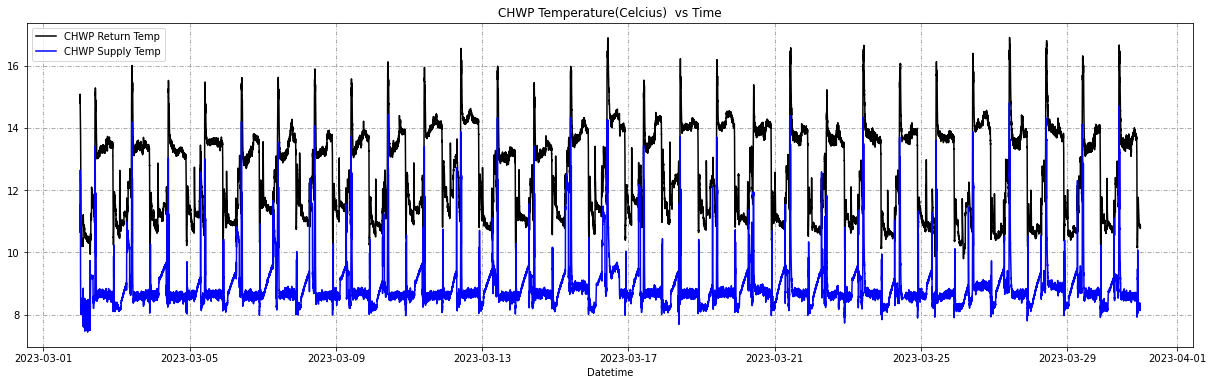

In [101]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CHWP Temperature(Celcius)  vs Time')

axes_1.plot(dfs['datetime'],dfs['hdr_chw_rettemp'], label ='CHWP Return Temp', color= 'BLACK')
axes_1.plot(dfs['datetime'],dfs['hdr_chw_supptemp'], label ='CHWP Supply Temp', color= 'Blue')


axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [105]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CHWP  Delta Temperature(Celcius)  vs Time')

axes_1.plot(dfs['datetime'],dfs['delta cdw'], label ='CDWP Delta Temp', color= 'BLACK')



axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

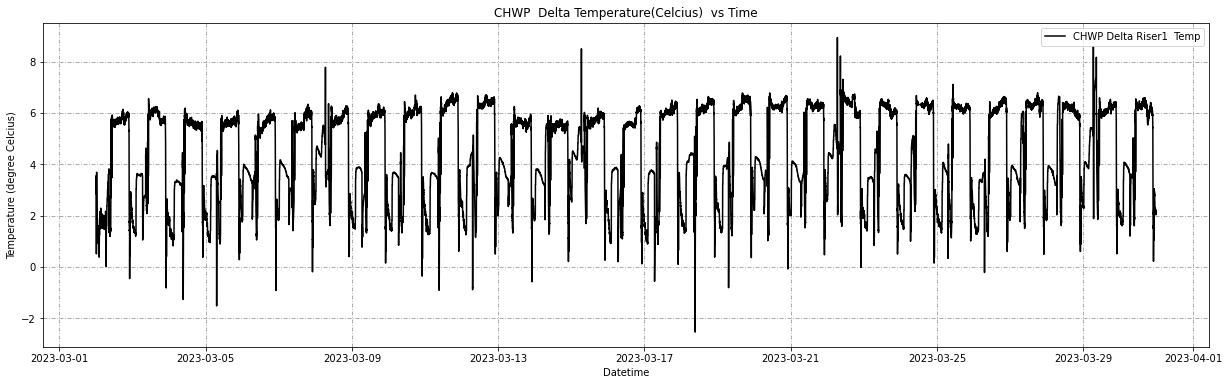

In [30]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('Temperature (degree Celcius)')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CHWP  Delta Temperature(Celcius)  vs Time')

axes_1.plot(dfs['datetime'],dfs['delta chw riser 1'], label ='CHWP Delta Riser1  Temp', color= 'BLACK')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

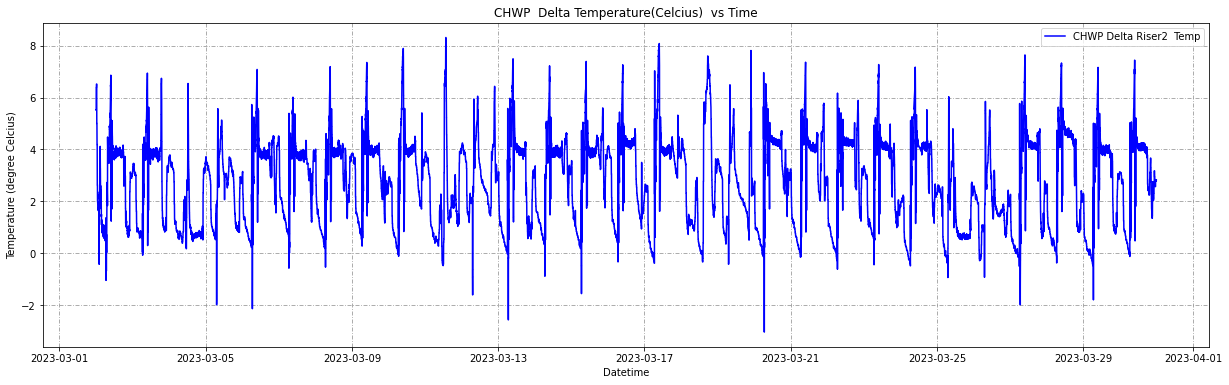

In [33]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('Temperature (degree Celcius)')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CHWP  Delta Temperature(Celcius)  vs Time')


axes_1.plot(dfs['datetime'],dfs['delta chw riser 2'], label ='CHWP Delta Riser2  Temp', color= 'Blue')




axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

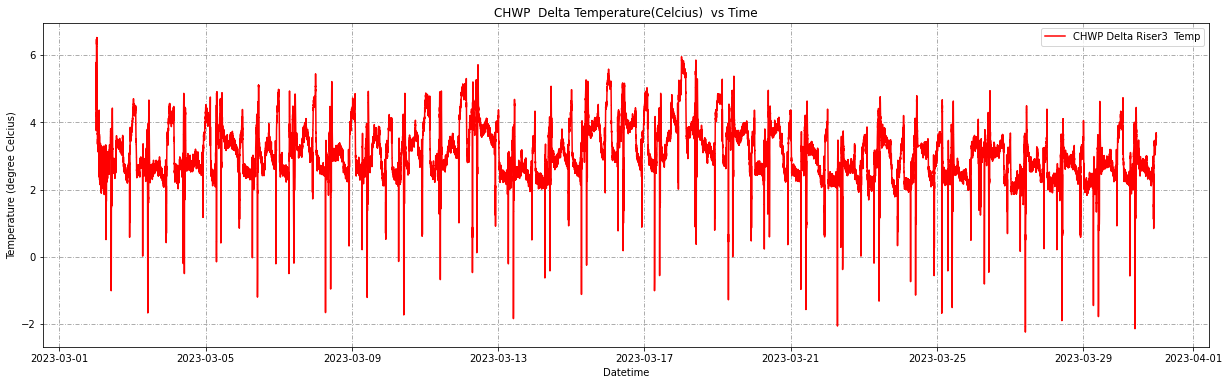

In [32]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('Temperature (degree Celcius)')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CHWP  Delta Temperature(Celcius)  vs Time')

axes_1.plot(dfs['datetime'],dfs['delta chw riser 3'], label ='CHWP Delta Riser3  Temp', color= 'red')



axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

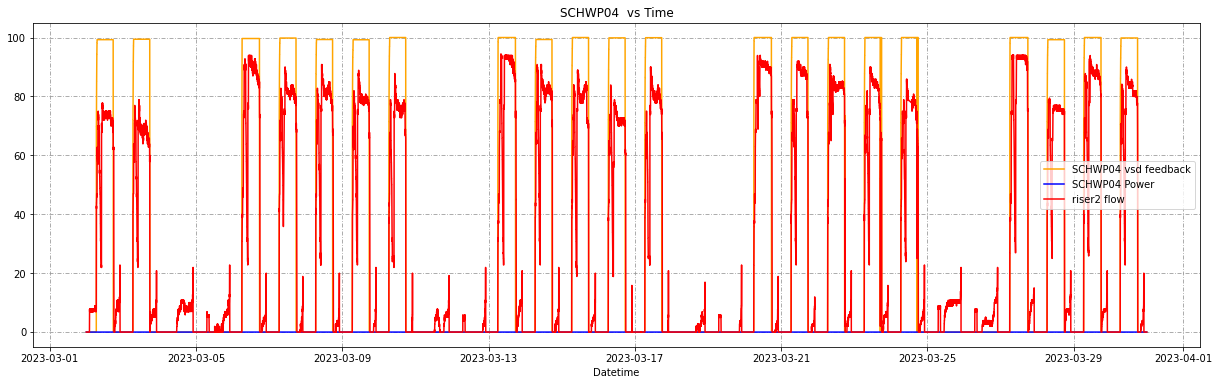

In [34]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('SCHWP04  vs Time')
axes_1.plot(dfs['datetime'],dfs['schwp4_vsd_ctrl'], label ='SCHWP04 vsd feedback', color= 'Orange')
#axes_1.plot(dfs['datetime'],dfs['schwp4_vsd_ctrl'], label ='SCHWP04 vsd command', color= 'BLACK')
axes_1.plot(dfs['datetime'],dfs['schwp4_kw'], label ='SCHWP04 Power', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['riser2_chw_flow'], label ='riser2 flow', color= 'red')

axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

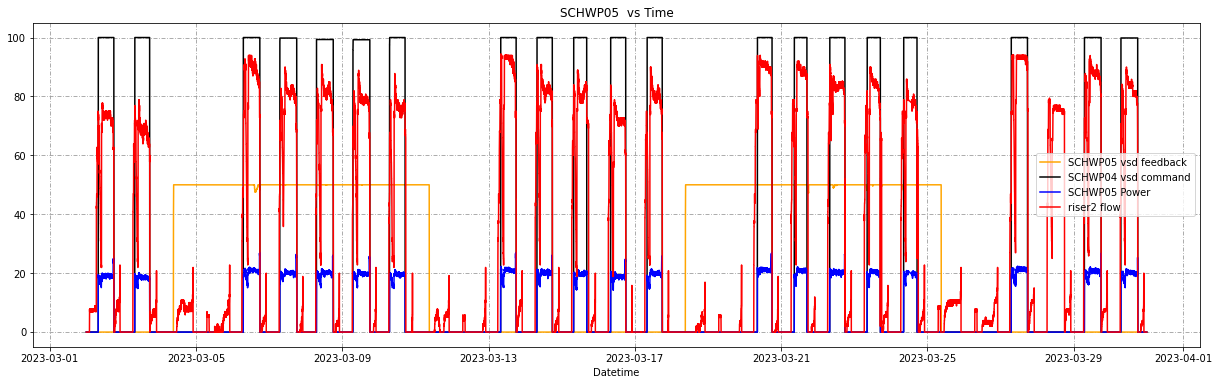

In [35]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('SCHWP05  vs Time')
axes_1.plot(dfs['datetime'],dfs['schwp5_vsd_fb'], label ='SCHWP05 vsd feedback', color= 'Orange')
axes_1.plot(dfs['datetime'],dfs['schwp5_vsd_ctrl'], label ='SCHWP04 vsd command', color= 'BLACK')
axes_1.plot(dfs['datetime'],dfs['schwp5_kw'], label ='SCHWP05 Power', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['riser2_chw_flow'], label ='riser2 flow', color= 'red')

axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

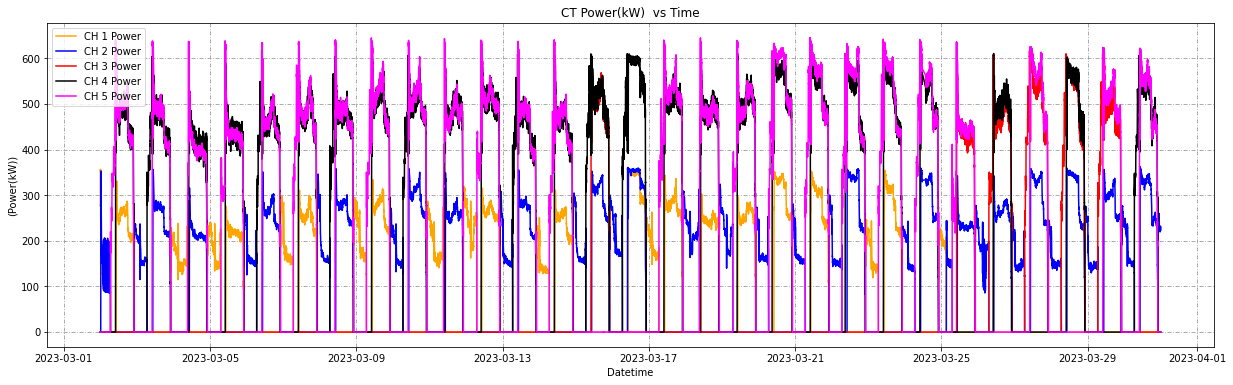

In [36]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CT Power(kW)  vs Time')
axes_1.plot(dfs['datetime'],dfs['ch1_kw'], label ='CH 1 Power', color= 'Orange')
axes_1.plot(dfs['datetime'],dfs['ch2_kw'], label ='CH 2 Power', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['ch3_kw'], label ='CH 3 Power', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['ch4_kw'], label ='CH 4 Power', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['ch5_kw'], label ='CH 5 Power', color= 'Magenta')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

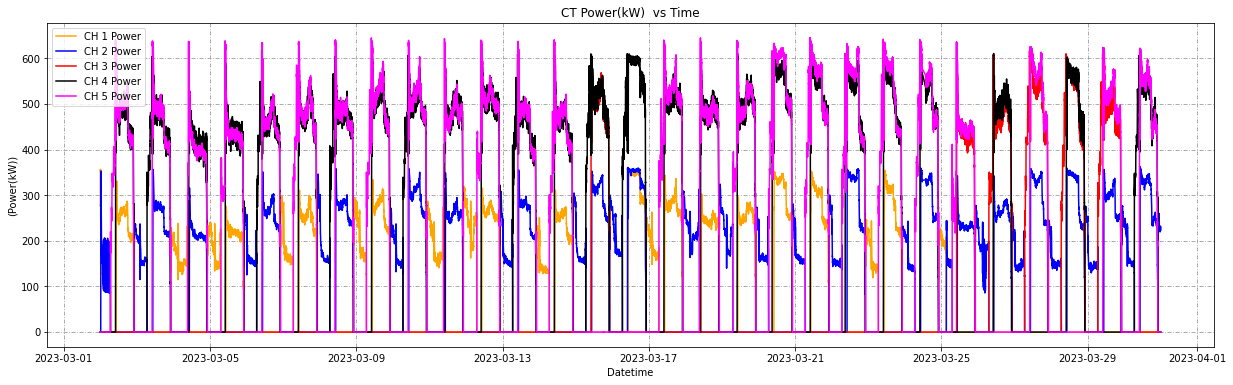

In [37]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CT Power(kW)  vs Time')
axes_1.plot(dfs['datetime'],dfs['ch1_kw'], label ='CH 1 Power', color= 'Orange')
axes_1.plot(dfs['datetime'],dfs['ch2_kw'], label ='CH 2 Power', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['ch3_kw'], label ='CH 3 Power', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['ch4_kw'], label ='CH 4 Power', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['ch5_kw'], label ='CH 5 Power', color= 'Magenta')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [38]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Speed(%))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CT Speed  vs Time')
axes_1.plot(dfs['datetime'],dfs['ct1_f1_vsd_ctrl'], label ='CT1A Speed', color= 'GREY')
axes_1.plot(dfs['datetime'],dfs['ct1_f2_vsd_ctrl'], label ='CT1B Speed', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['ct2_f1_vsd_fb'], label ='CT2A Speed Feedback', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['ct2_f2_vsd_ctrl'], label ='CT2B Speed', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['ct3_f1_vsd_ctrl'], label ='CT3A Speed', color= 'Magenta')
axes_1.plot(dfs['datetime'],dfs['ct3_f2_vsd_ctrl'], label ='CT3B Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

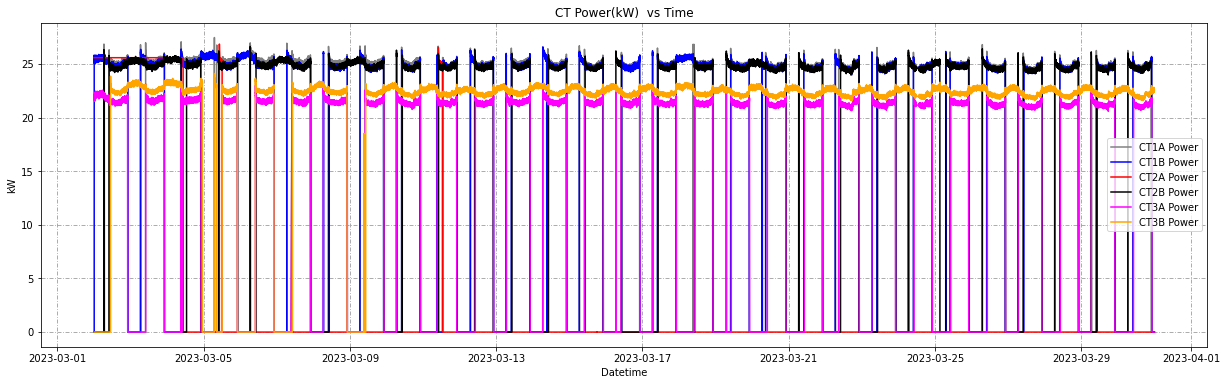

In [40]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('kW')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CT Power(kW)  vs Time')
axes_1.plot(dfs['datetime'],dfs['ct1_f1_kw'], label ='CT1A Power', color= 'GREY')
axes_1.plot(dfs['datetime'],dfs['ct1_f2_kw'], label ='CT1B Power', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['ct2_f1_kw'], label ='CT2A Power', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['ct2_f2_kw'], label ='CT2B Power', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['ct3_f1_kw'], label ='CT3A Power', color= 'Magenta')

axes_1.plot(dfs['datetime'],dfs['ct3_f2_kw'], label ='CT3B Power', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [41]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Speed(%))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CDWP Speed (%) vs Time')
axes_1.plot(dfs['datetime'],dfs['cdwp1_vsd_ctrl'], label ='CDWP1 Speed', color= 'GREY')
axes_1.plot(dfs['datetime'],dfs['cdwp2_vsd_ctrl'], label ='CDWP2 Speed', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['cdwp3_vsd_ctrl'], label ='CDWP3 Speed', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['cdwp4_vsd_ctrl'], label ='CDWP4 Speed', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['cdwp5_vsd_ctrl'], label ='CDWP5 Speed', color= 'Magenta')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [42]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CDWP (kW) vs Time')
axes_1.plot(dfs['datetime'],dfs['cdwp1_kw'], label ='CDWP1 Power (kW)', color= 'GREY')
axes_1.plot(dfs['datetime'],dfs['cdwp2_kw'], label ='CDWP2 Power (kW)', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['cdwp3_kw'], label ='CDWP3 Power (kW)', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['cdwp4_kw'], label ='CDWP4 Power (kW)', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['cdwp5_kw'], label ='CDWP5 Power (kW)', color= 'Magenta')
#axes_1.plot(dfs['datetime'],dfs['ct3_f2_vsd_ctrl'], label ='CT Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

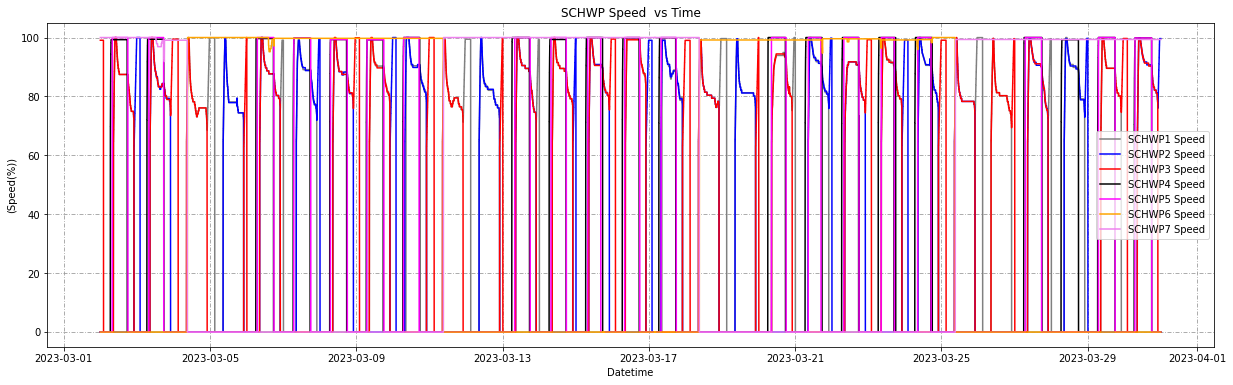

In [43]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Speed(%))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('SCHWP Speed  vs Time')
axes_1.plot(dfs['datetime'],dfs['schwp1_vsd_ctrl'], label ='SCHWP1 Speed', color= 'GREY')
axes_1.plot(dfs['datetime'],dfs['schwp2_vsd_ctrl'], label ='SCHWP2 Speed', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['schwp3_vsd_ctrl'], label ='SCHWP3 Speed', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['schwp4_vsd_ctrl'], label ='SCHWP4 Speed', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['schwp5_vsd_ctrl'], label ='SCHWP5 Speed', color= 'Magenta')
axes_1.plot(dfs['datetime'],dfs['schwp6_vsd_ctrl'], label ='SCHWP6 Speed', color= 'Orange')
axes_1.plot(dfs['datetime'],dfs['schwp7_vsd_ctrl'], label ='SCHWP7 Speed', color= 'Violet')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

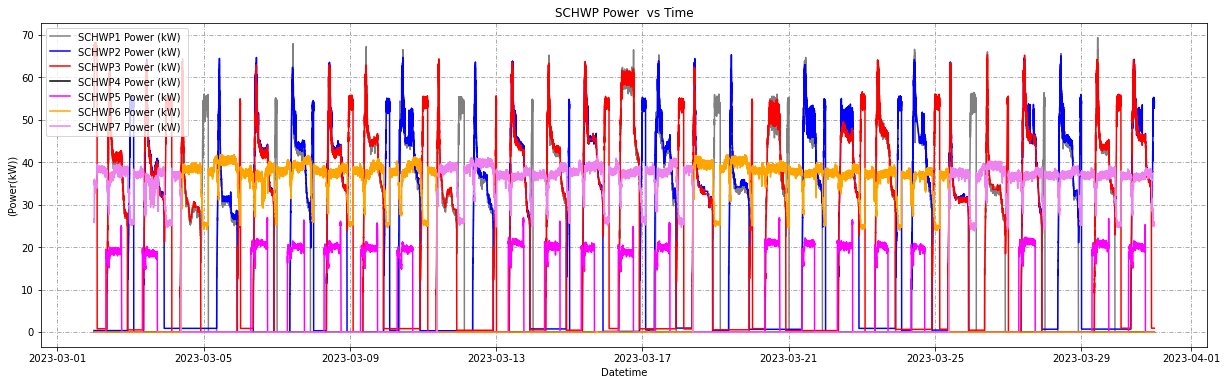

In [44]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('SCHWP Power  vs Time')
axes_1.plot(dfs['datetime'],dfs['schwp1_kw'], label ='SCHWP1 Power (kW) ', color= 'GREY')
axes_1.plot(dfs['datetime'],dfs['schwp2_kw'], label ='SCHWP2 Power (kW)', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['schwp3_kw'], label ='SCHWP3 Power (kW)', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['schwp4_kw'], label ='SCHWP4 Power (kW)', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['schwp5_kw'], label ='SCHWP5 Power (kW)', color= 'Magenta')
axes_1.plot(dfs['datetime'],dfs['schwp6_kw'], label ='SCHWP6 Power (kW)', color= 'Orange')
axes_1.plot(dfs['datetime'],dfs['schwp7_kw'], label ='SCHWP7 Power (kW)', color= 'Violet')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

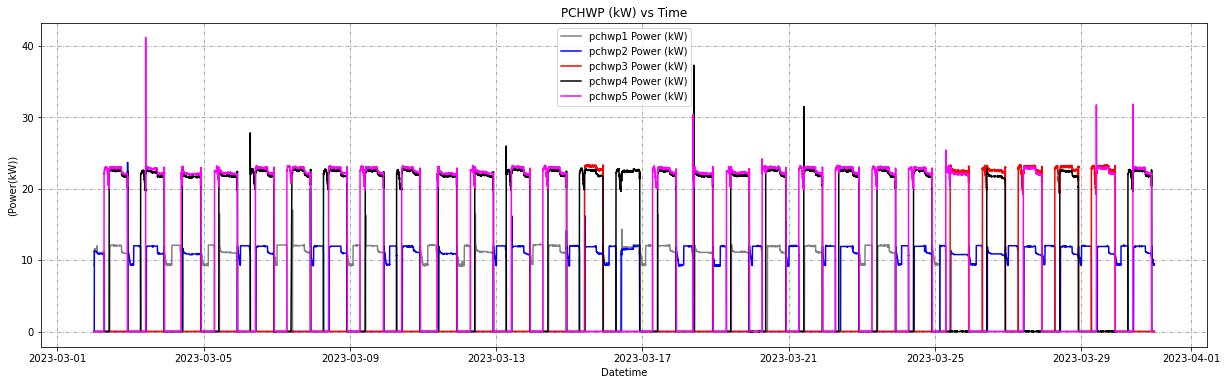

In [55]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('PCHWP (kW) vs Time')
axes_1.plot(dfs['datetime'],dfs['pchwp1_kw'], label ='pchwp1 Power (kW)', color= 'GREY')
axes_1.plot(dfs['datetime'],dfs['pchwp2_kw'], label ='pchwp2 Power (kW)', color= 'Blue')
axes_1.plot(dfs['datetime'],dfs['pchwp3_kw'], label ='pchwp3 Power (kW)', color= 'Red')
axes_1.plot(dfs['datetime'],dfs['pchwp4_kw'], label ='pchwp4 Power (kW)', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['pchwp5_kw'], label ='pchwp5 Power (kW)', color= 'Magenta')
#axes_1.plot(dfs['datetime'],dfs['ct3_f2_vsd_ctrl'], label ='CT Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [46]:
dfs

datetime  hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
0     2023-03-02 00:00:30         11.340000        14.799999    110.000088   
1     2023-03-02 00:01:00         11.380000        14.950000    100.000080   
2     2023-03-02 00:01:30         11.530000        14.950000    100.000080   
3     2023-03-02 00:02:00         11.530000        14.950000    100.000080   
4     2023-03-02 00:02:30         11.509999        15.000000    100.000080   
...                   ...               ...              ...           ...   
83036 2023-03-30 23:57:30          8.210000        10.860000    110.000088   
83037 2023-03-30 23:58:00          8.190000        10.770000    110.000088   
83038 2023-03-30 23:58:30          8.190000        10.770000    110.000088   
83039 2023-03-30 23:59:00          8.190000        10.770000    110.000088   
83040 2023-03-30 23:59:30          8.200000        10.860000    110.000088   

       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp       oa_t      oa_rh  \
0      568.00000         29.685112        34.584270  23.970888  53.301865   
1      596.40000         29.528143        34.584270  23.970888  53.301865   
2      568.00000         29.528143        34.735176  23.970888  53.301865   
3      596.40000         29.370914        34.735176  23.970888  53.301865   
4      568.00000         29.370914        34.735176  23.970888  53.301865   
...          ...               ...              ...        ...        ...   
83036  426.00000         28.965504        32.694977  27.257566  53.168694   
83037  426.00000         28.965504        32.694977  27.257566  53.168694   
83038  426.00000         28.965504        32.694977  27.257566  53.168694   
83039  426.00000         28.965504        32.694977  27.257566  53.168694   
83040  397.60004         28.965504        32.694977  27.257566  53.019970   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
0           11.367560        7.294719       66.911798       100.000080   
1           11.366617        7.294830       67.311001       100.000080   
2           11.367274        7.294830       67.311001       105.000084   
3           11.365895        7.293455       67.182853       105.000084   
4           11.362108        7.293455       67.182853       100.000080   
...               ...             ...             ...              ...   
83036       11.655072        7.636156       78.572053       100.000080   
83037       11.491785        7.637257       78.419038       105.000084   
83038       11.491785        7.638466       78.450534       105.000084   
83039       12.193249        7.639491       78.576695       105.000084   
83040       12.193249        7.639735       78.960630       100.000080   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
0                11.480000           14.370000              0.0   
1                11.380000           14.360000              0.0   
2                11.360000           14.349999              0.0   
3                11.360000           14.349999              0.0   
4                11.509999           14.360000              0.0   
...                    ...                 ...              ...   
83036             8.090000           10.240000              0.0   
83037             8.170000           10.250000              0.0   
83038             8.170000           10.250000              0.0   
83039             8.170000           10.250000              0.0   
83040             8.160000           10.230000              0.0   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
0                 9.719999               15.24        45.833370   
1                 9.719999               15.24        46.944482   
2                 9.719999               15.24        45.833370   
3                 9.719999               15.24        45.833370   
4                 9.719999               15.24        46.944482   
...                    ...                 ...             

In [47]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('RT(kW/RT)')
axes_1.set_ylabel('Plant Efficiency (kW/RT)')
axes_1.set_ylim(bottom= 0, top= 2.5)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('Efficiency (kW/RT) vs Load (RT)')
axes_1.scatter(dfs['hdr_hgain'],dfs['Plant Eff'], label ='Current Plant Efficiency', color= 'Orange')
axes_1.scatter(dfs['hdr_hgain'],dfs['Plant eff after saving'], label ='Plant Efficiency after saving', color= 'Blue')

#axes_1.plot(dfs['datetime'],dfs['ct3_f2_vsd_ctrl'], label ='CT Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [48]:
sns.displot(dfs['hdr_hgain'], stat='percent', bins = 50, color= 'MAGENTA')
plt.xlabel('Chiller Plant Load (RT)')
plt.title("Distribution of Chiller Plant Load (RT)")

Text(0.5, 1.0, 'Distribution of Chiller Plant Load (RT)')

Text(0.5, 0, 'RT')

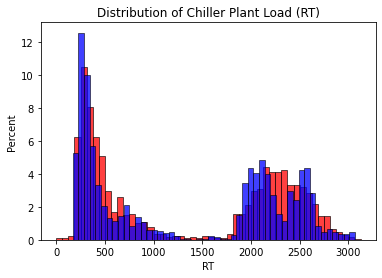

In [56]:
plt.figure() 
sns.histplot(dfs['hdr_hgain'], stat='percent', bins = 50, color = 'red') 
sns.histplot(spm_df['Total Building Load (RT)'], stat='percent', bins = 50, color= 'blue')
plt.title("Distribution of Chiller Plant Load (RT)")
plt.xlabel('RT')


Text(0.5, 1.0, 'Distribution of Riser1 Load (RT)')

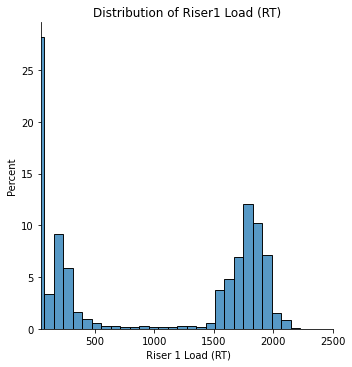

In [57]:

sns.displot(dfs['riser1_hgain'], stat='percent')
plt.xlabel(' Riser 1 Load (RT)')
plt.xlim(50)
plt.title("Distribution of Riser1 Load (RT)")


Text(0.5, 1.0, 'Distribution of Riser2 Load (RT)')

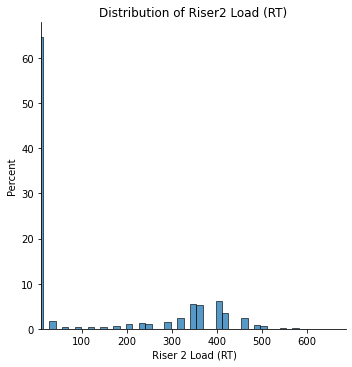

In [58]:
sns.displot(dfs['riser2_hgain'], stat='percent')
plt.xlabel(' Riser 2 Load (RT)')
plt.xlim(10)
plt.title("Distribution of Riser2 Load (RT)")

Text(0.5, 1.0, 'Distribution of Riser3 Load (RT)')

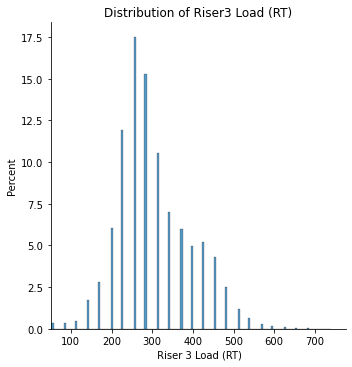

In [59]:
sns.displot(dfs['riser3_hgain'], stat='percent')
plt.xlabel(' Riser 3 Load (RT)')
plt.xlim(50)
plt.title("Distribution of Riser3 Load (RT)")

In [60]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('Saving (kW) vs Time')
axes_1.plot(dfs['datetime'],dfs['saving (kW)'], label ='Saving (kW)', color= 'Red')
#axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f2_vsd_ctrl'], label ='CT Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [61]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('Humidity (%), Temperature(Celcius)')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('Outdoor Humidity (%), Outdoor Temperature(degree celcius) vs Time')
axes_1.plot(dfs['datetime'],dfs['oa_rh'], label ='Outdoor Humidity (%)', color= 'Black')
axes_1.plot(dfs['datetime'],dfs['oa_t'], label ='Outdoor Temperature (degree celcius)', color= 'Blue')
#axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f2_vsd_ctrl'], label ='CT Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

# analyze by week ( to Lalika also here start from the graph)

In [51]:
dfs_week1 = dfs[(dfs['datetime'] > '2023-03-12') & (dfs['datetime'] < '2023-03-19')] 

In [20]:
dfs_week1.to_csv('sp_m03w02.csv')

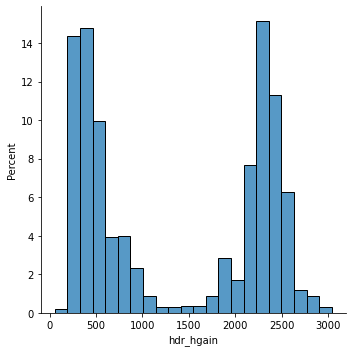

In [52]:
sns.displot(dfs_week1['hdr_hgain'], stat='percent')

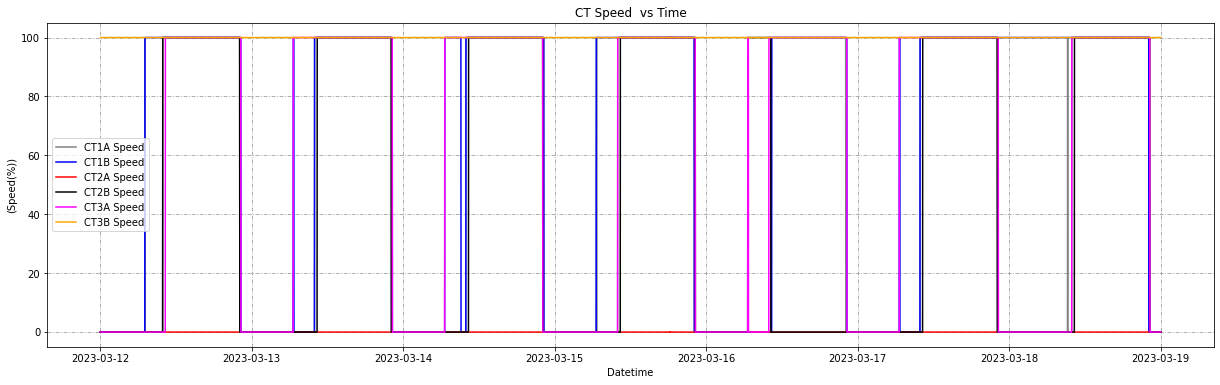

In [53]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Speed(%))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CT Speed  vs Time')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct1_f1_vsd_ctrl'], label ='CT1A Speed', color= 'GREY')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct1_f2_vsd_ctrl'], label ='CT1B Speed', color= 'Blue')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct2_f1_vsd_ctrl'], label ='CT2A Speed', color= 'Red')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct2_f2_vsd_ctrl'], label ='CT2B Speed', color= 'Black')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f1_vsd_ctrl'], label ='CT3A Speed', color= 'Magenta')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f2_vsd_ctrl'], label ='CT3B Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

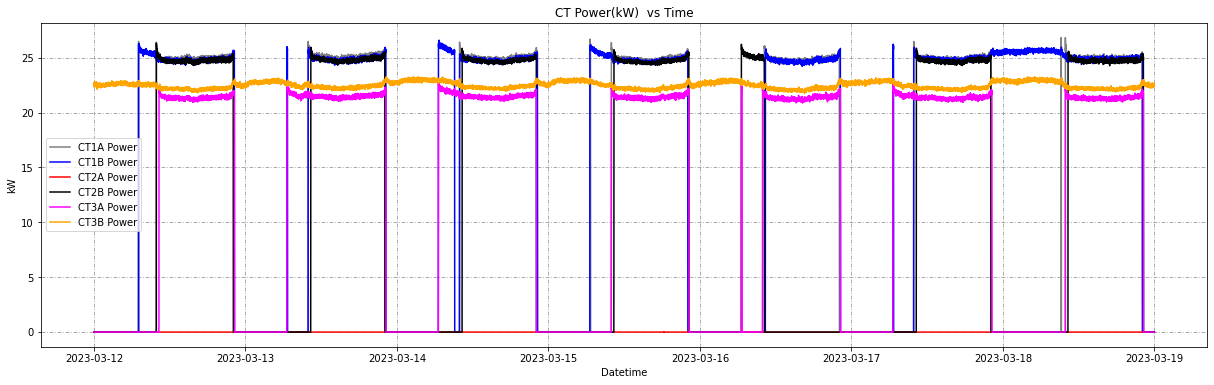

In [55]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('kW')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CT Power(kW)  vs Time')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct1_f1_kw'], label ='CT1A Power', color= 'GREY')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct1_f2_kw'], label ='CT1B Power', color= 'Blue')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct2_f1_kw'], label ='CT2A Power', color= 'Red')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct2_f2_kw'], label ='CT2B Power', color= 'Black')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f1_kw'], label ='CT3A Power', color= 'Magenta')
axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f2_kw'], label ='CT3B Power', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

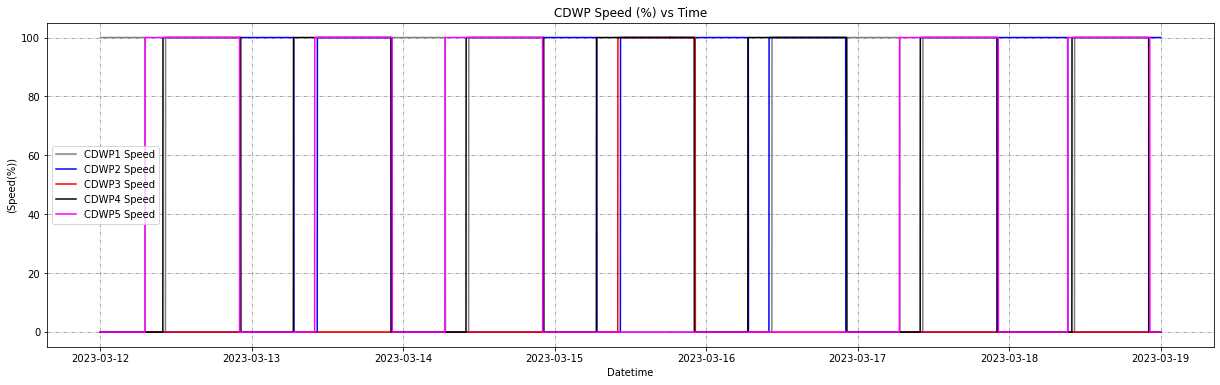

In [56]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Speed(%))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CDWP Speed (%) vs Time')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp1_vsd_ctrl'], label ='CDWP1 Speed', color= 'GREY')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp2_vsd_ctrl'], label ='CDWP2 Speed', color= 'Blue')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp3_vsd_ctrl'], label ='CDWP3 Speed', color= 'Red')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp4_vsd_ctrl'], label ='CDWP4 Speed', color= 'Black')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp5_vsd_ctrl'], label ='CDWP5 Speed', color= 'Magenta')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

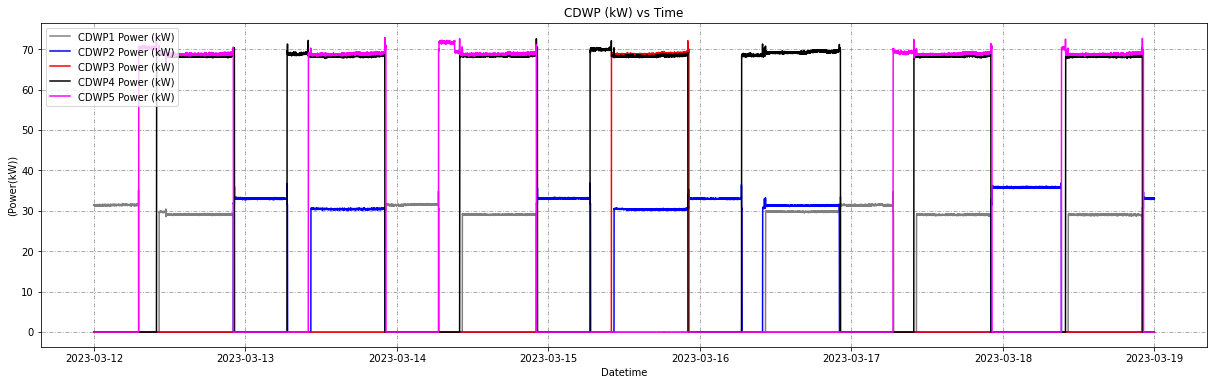

In [57]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CDWP (kW) vs Time')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp1_kw'], label ='CDWP1 Power (kW)', color= 'GREY')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp2_kw'], label ='CDWP2 Power (kW)', color= 'Blue')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp3_kw'], label ='CDWP3 Power (kW)', color= 'Red')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp4_kw'], label ='CDWP4 Power (kW)', color= 'Black')
axes_1.plot(dfs_week1['datetime'],dfs_week1['cdwp5_kw'], label ='CDWP5 Power (kW)', color= 'Magenta')
#axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f2_vsd_ctrl'], label ='CT Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

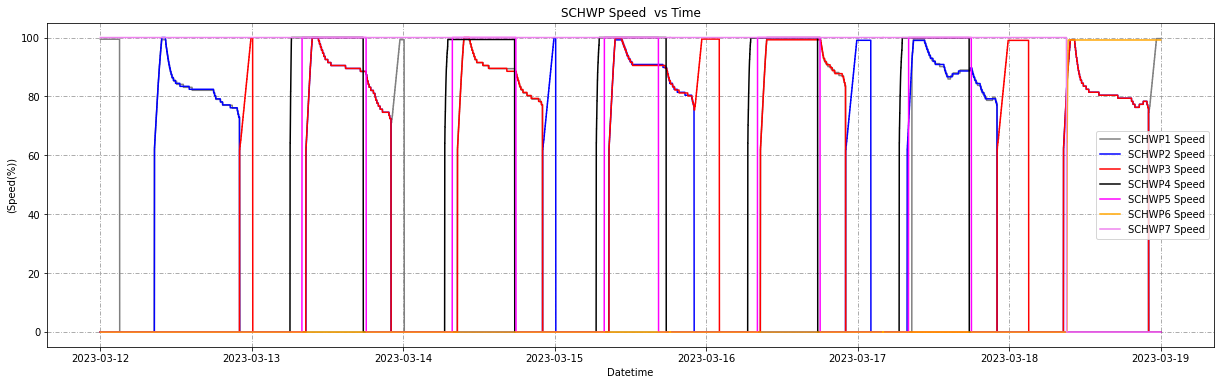

In [58]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Speed(%))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('SCHWP Speed  vs Time')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp1_vsd_ctrl'], label ='SCHWP1 Speed', color= 'GREY')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp2_vsd_ctrl'], label ='SCHWP2 Speed', color= 'Blue')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp3_vsd_ctrl'], label ='SCHWP3 Speed', color= 'Red')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp4_vsd_ctrl'], label ='SCHWP4 Speed', color= 'Black')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp5_vsd_ctrl'], label ='SCHWP5 Speed', color= 'Magenta')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp6_vsd_ctrl'], label ='SCHWP6 Speed', color= 'Orange')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp7_vsd_ctrl'], label ='SCHWP7 Speed', color= 'Violet')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [59]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('SCHWP Power  vs Time')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp1_kw'], label ='SCHWP1 Power (kW) ', color= 'GREY')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp2_kw'], label ='SCHWP2 Power (kW)', color= 'Blue')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp3_kw'], label ='SCHWP3 Power (kW)', color= 'Red')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp4_kw'], label ='SCHWP4 Power (kW)', color= 'Black')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp5_kw'], label ='SCHWP5 Power (kW)', color= 'Magenta')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp6_kw'], label ='SCHWP6 Power (kW)', color= 'Orange')
axes_1.plot(dfs_week1['datetime'],dfs_week1['schwp7_kw'], label ='SCHWP7 Power (kW)', color= 'Violet')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [60]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('PCHWP (kW) vs Time')
axes_1.plot(dfs_week1['datetime'],dfs_week1['pchwp1_kw'], label ='pchwp1 Power (kW)', color= 'GREY')
axes_1.plot(dfs_week1['datetime'],dfs_week1['pchwp2_kw'], label ='pchwp2 Power (kW)', color= 'Blue')
axes_1.plot(dfs_week1['datetime'],dfs_week1['pchwp3_kw'], label ='pchwp3 Power (kW)', color= 'Red')
axes_1.plot(dfs_week1['datetime'],dfs_week1['pchwp4_kw'], label ='pchwp4 Power (kW)', color= 'Black')
axes_1.plot(dfs_week1['datetime'],dfs_week1['pchwp5_kw'], label ='pchwp5 Power (kW)', color= 'Magenta')
#axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f2_vsd_ctrl'], label ='CT Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

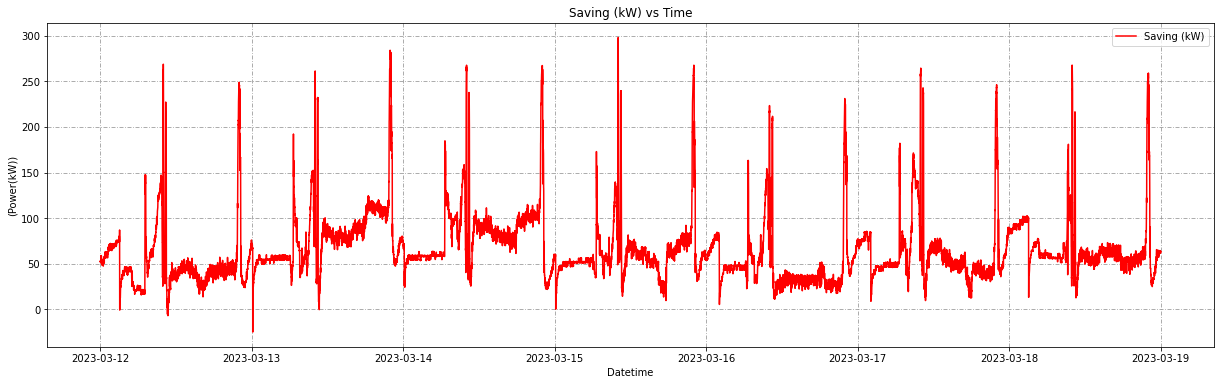

In [61]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Datetime')
axes_1.set_ylabel('(Power(kW))')
#axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('Saving (kW) vs Time')
axes_1.plot(dfs_week1['datetime'],dfs_week1['saving (kW)'], label ='Saving (kW)', color= 'Red')
#axes_1.plot(dfs_week1['datetime'],dfs_week1['ct3_f2_vsd_ctrl'], label ='CT Speed', color= 'Orange')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

# hourly calculation

In [62]:
dfs.reset_index(inplace =True)

In [64]:
del dfs['index']

In [65]:
dfs

datetime  hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
0     2023-03-02 00:00:30         11.340000        14.799999    110.000088   
1     2023-03-02 00:01:00         11.380000        14.950000    100.000080   
2     2023-03-02 00:01:30         11.530000        14.950000    100.000080   
3     2023-03-02 00:02:00         11.530000        14.950000    100.000080   
4     2023-03-02 00:02:30         11.509999        15.000000    100.000080   
...                   ...               ...              ...           ...   
83036 2023-03-30 23:57:30          8.210000        10.860000    110.000088   
83037 2023-03-30 23:58:00          8.190000        10.770000    110.000088   
83038 2023-03-30 23:58:30          8.190000        10.770000    110.000088   
83039 2023-03-30 23:59:00          8.190000        10.770000    110.000088   
83040 2023-03-30 23:59:30          8.200000        10.860000    110.000088   

       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp       oa_t      oa_rh  \
0      568.00000         29.685112        34.584270  23.970888  53.301865   
1      596.40000         29.528143        34.584270  23.970888  53.301865   
2      568.00000         29.528143        34.735176  23.970888  53.301865   
3      596.40000         29.370914        34.735176  23.970888  53.301865   
4      568.00000         29.370914        34.735176  23.970888  53.301865   
...          ...               ...              ...        ...        ...   
83036  426.00000         28.965504        32.694977  27.257566  53.168694   
83037  426.00000         28.965504        32.694977  27.257566  53.168694   
83038  426.00000         28.965504        32.694977  27.257566  53.168694   
83039  426.00000         28.965504        32.694977  27.257566  53.168694   
83040  397.60004         28.965504        32.694977  27.257566  53.019970   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
0           11.367560        7.294719       66.911798       100.000080   
1           11.366617        7.294830       67.311001       100.000080   
2           11.367274        7.294830       67.311001       105.000084   
3           11.365895        7.293455       67.182853       105.000084   
4           11.362108        7.293455       67.182853       100.000080   
...               ...             ...             ...              ...   
83036       11.655072        7.636156       78.572053       100.000080   
83037       11.491785        7.637257       78.419038       105.000084   
83038       11.491785        7.638466       78.450534       105.000084   
83039       12.193249        7.639491       78.576695       105.000084   
83040       12.193249        7.639735       78.960630       100.000080   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
0                11.480000           14.370000              0.0   
1                11.380000           14.360000              0.0   
2                11.360000           14.349999              0.0   
3                11.360000           14.349999              0.0   
4                11.509999           14.360000              0.0   
...                    ...                 ...              ...   
83036             8.090000           10.240000              0.0   
83037             8.170000           10.250000              0.0   
83038             8.170000           10.250000              0.0   
83039             8.170000           10.250000              0.0   
83040             8.160000           10.230000              0.0   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
0                 9.719999               15.24        45.833370   
1                 9.719999               15.24        46.944482   
2                 9.719999               15.24        45.833370   
3                 9.719999               15.24        45.833370   
4                 9.719999               15.24        46.944482   
...                    ...                 ...             

In [66]:
dfs['schwp4_kw'].describe()

count    83039.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: schwp4_kw, dtype: float64

In [248]:
dfs.to_csv('sunway putra mall.csv')

In [68]:
dfsx = dfs.resample(rule='1Min', on='datetime').mean()

In [69]:
dfsx

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
datetime                                                               
2023-03-02 00:00:00         11.340000        14.799999    110.000088   
2023-03-02 00:01:00         11.455000        14.950000    100.000080   
2023-03-02 00:02:00         11.520000        14.975000    100.000080   
2023-03-02 00:03:00         11.509999        15.000000    100.000080   
2023-03-02 00:04:00         11.149999        15.044999    100.000080   
...                               ...              ...           ...   
2023-03-30 23:55:00          8.200000        10.900000    110.000088   
2023-03-30 23:56:00          8.180000        10.900000    110.000088   
2023-03-30 23:57:00          8.185000        10.880000    110.000088   
2023-03-30 23:58:00          8.190000        10.770000    110.000088   
2023-03-30 23:59:00          8.195000        10.815000    110.000088   

                     hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp       oa_t  \
datetime                                                                       
2023-03-02 00:00:00  568.00000         29.685112        34.584270  23.970888   
2023-03-02 00:01:00  582.20000         29.528143        34.659723  23.970888   
2023-03-02 00:02:00  582.20000         29.370914        34.735176  23.970888   
2023-03-02 00:03:00  568.00000         29.215845        34.811658  23.970888   
2023-03-02 00:04:00  610.60000         29.139882        35.126074  23.970888   
...                        ...               ...              ...        ...   
2023-03-30 23:55:00  426.00000         28.965504        32.694977  27.408918   
2023-03-30 23:56:00  426.00000         28.965504        32.694977  27.408918   
2023-03-30 23:57:00  426.00000         28.965504        32.694977  27.257566   
2023-03-30 23:58:00  426.00000         28.965504        32.694977  27.257566   
2023-03-30 23:59:00  411.80002         28.965504        32.694977  27.257566   

                         oa_rh  riser1_chw_dpi  riser2_chw_dpi  \
datetime                                                         
2023-03-02 00:00:00  53.301865       11.367560        7.294719   
2023-03-02 00:01:00  53.301865       11.366946        7.294830   
2023-03-02 00:02:00  53.301865       11.364001        7.293455   
2023-03-02 00:03:00  53.301865       11.360649        7.295097   
2023-03-02 00:04:00  53.301865       11.365151        7.306421   
...                        ...             ...             ...   
2023-03-30 23:55:00  53.168694       11.672737        7.634306   
2023-03-30 23:56:00  53.168694       11.890398        7.634726   
2023-03-30 23:57:00  53.168694       11.655072        7.636064   
2023-03-30 23:58:00  53.168694       11.491785        7.637861   
2023-03-30 23:59:00  53.094332       12.193249        7.639613   

                     riser3_chw_dpi  riser1_chw_flow  riser1_chw_supptemp  \
datetime                                                                    
2023-03-02 00:00:00       66.911798       100.000080            11.480000   
2023-03-02 00:01:00       67.311001       102.500082            11.370000   
2023-03-02 00:02:00       67.182853       102.500082            11.434999   
2023-03-02 00:03:00       67.200906       100.000080            11.509999   
2023-03-02 00:04:00       67.342234       100.000080            11.300000   
...                             ...              ...                  ...   
2023-03-30 23:55:00       78.767703       105.000084             8.099999   
2023-03-30 23:56:00       78.707785       105.000084             8.095000   
2023-03-30 23:57:00       78.669155       102.500082             8.090000   
2023-03-30 23:58:00       78.434786       105.000084             8.170000   
2023-03-30 23:59:00       78.768663       102.500082             8.165000   

                     riser1_chw_rettemp  riser2_chw_flow  riser2_chw_supptemp  \
datetime                                                                        
2023-03-02 00:00:00 

In [72]:
dfs_daily = dfs.resample(rule='D', on='datetime').mean()

In [77]:
dfs_daily[['sys_eff','chiller eff','pchwp eff','schwp eff','cdwp eff','ct eff','sys_kw','hdr_hgain','saving (kW)']]

sys_eff  chiller eff  pchwp eff  schwp eff  cdwp eff    ct eff  \
datetime                                                                      
2023-03-02  0.930592     0.585947   0.038117   0.097170  0.115470  0.123137   
2023-03-03  0.915294     0.557851   0.032284   0.104770  0.102470  0.145240   
2023-03-04  0.905929     0.546546   0.033700   0.115637  0.104380  0.145102   
2023-03-05  0.861591     0.560307   0.033014   0.106789  0.093317  0.073645   
2023-03-06  0.874830     0.568883   0.033494   0.101350  0.089869  0.073844   
2023-03-07  0.847104     0.561012   0.031967   0.093136  0.084373  0.068845   
2023-03-08  0.862987     0.567802   0.032146   0.097767  0.094113  0.066530   
2023-03-09  0.868122     0.572388   0.030744   0.102318  0.082405  0.067108   
2023-03-10  0.874540     0.569737   0.031122   0.107957  0.092644  0.064399   
2023-03-11  0.837966     0.558035   0.029592   0.103209  0.087092  0.060998   
2023-03-12  0.802378     0.550384   0.026586   0.087395  0.080327  0.056859   
2023-03-13  0.892713     0.574055   0.034716   0.101408  0.101970  0.070798   
2023-03-14  0.866070     0.547015   0.035227   0.102139  0.100486  0.075570   
2023-03-15  0.826049     0.553033   0.029848   0.090081  0.087734  0.061282   
2023-03-16  0.799606     0.542949   0.025894   0.099658  0.076158  0.053762   
2023-03-17  0.813251     0.538905   0.027847   0.096868  0.082251  0.060909   
2023-03-18  0.791093     0.521921   0.025534   0.089060  0.079442  0.076334   
2023-03-19  0.816488     0.547165   0.028103   0.093085  0.086013  0.064220   
2023-03-20  0.868263     0.559804   0.030359   0.090705  0.090576  0.085773   
2023-03-21  0.871832     0.571135   0.031657   0.095620  0.092377  0.064588   
2023-03-22  0.923579     0.589767   0.035112   0.102283  0.102608  0.071654   
2023-03-23  0.900376     0.579866   0.033750   0.109679  0.098268  0.069020   
2023-03-24  0.934687     0.590210   0.035037   0.114275  0.104531  0.078314   
2023-03-25  0.941095     0.576244   0.036021   0.114954  0.109251  0.087422   
2023-03-26  0.881245     0.578556   0.032292   0.107403  0.098291  0.068393   
2023-03-27  0.910854     0.588096   0.034821   0.104599  0.101528  0.069689   
2023-03-28  0.905706     0.591584   0.034453   0.097969  0.100306  0.069924   
2023-03-29  0.898566     0.579350   0.034835   0.105788  0.101111  0.069681   
2023-03-30  0.903294     0.593682   0.032194   0.109219  0.096492  0.067368   

                 sys_kw    hdr_hgain  saving (kW)  
datetime                                           
2023-03-02  1063.967383  1331.724710   122.880103  
2023-03-03  1030.436721  1285.859795   123.705357  
2023-03-04   893.220207  1113.960460   111.476420  
2023-03-05   925.140436  1200.560732    79.437293  
2023-03-06  1010.859675  1311.567266    77.987317  
2023-03-07  1021.265265  1351.844269    66.461264  
2023-03-08  1033.718391  1344.335757    75.426280  
2023-03-09  1067.251669  1385.308656    70.170041  
2023-03-10  1080.699432  1409.606429    71.241806  
2023-03-11   987.327499  1293.846851    59.639847  
2023-03-12  1066.366874  1424.920747    52.166319  
2023-03-13  1005.965246  1293.393244    80.592757  
2023-03-14   987.013301  1294.517429    82.777390  
2023-03-15  1076.263039  1425.466896    62.786361  
2023-03-16  1019.423178  1390.268339    50.259746  
2023-03-17  1102.024360  1470.509800    62.858909  
2023-03-18  1013.466470  1349.325457    68.243885  
2023-03-19  1035.790795  1381.778387    60.644554  
2023-03-20  1185.015661  1548.500192    60.998823  
2023-03-21  1129.722089  1450.263814    59.881717  
2023-03-22  1121.736939  1438.085361    66.791792  
2023-03-23  1085.899570  1410.306600    66.105633  
2023-03-24  1024.904741  1297.353331    70.091606  
2023-03-25   962.393975  1220.075487    82.424903  
2023-03-26   993.755702  1278.680471    71.173448  
2023-03-27  1102.681350  1434.318393    61.003349  
2023-03-28  1089.729779  1395.583951    58.294628  
2023-03-29  1055.843640  1385.505892    68.444322  
202

In [65]:
dfsx.describe()

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow     hdr_hgain  \
count      41531.000000     41531.000000  41531.000000  41531.000000   
mean           8.865199        12.599155    153.872532   1356.556338   
std            0.717394         1.390327    114.261857    966.297881   
min            7.470000         9.800000      0.000000      0.000000   
25%            8.565000        11.235000      0.000000    383.400000   
50%            8.679999        12.969999    230.000184   1065.000000   
75%            8.935000        13.730000    260.000208   2300.400100   
max           14.809999        16.910000    310.000248   3124.000200   

       hdr_cdw_supptemp  hdr_cdw_rettemp          oa_t         oa_rh  \
count      41531.000000     41531.000000  41531.000000  41531.000000   
mean          28.541756        32.007772     27.930959     53.798348   
std            1.192543         2.056969      2.724921      0.776434   
min           24.229490        25.591460     21.810888     51.149390   
25%           27.764069        30.452611     25.853233     53.226883   
50%           28.595066        32.246532     27.118538     53.790000   
75%           29.364996        33.559930     29.924566     54.356125   
max           32.428420        37.214317     34.943283     56.247550   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
count    41531.000000    41531.000000    41531.000000     41531.000000   
mean        35.031347       38.068192      230.316396       149.958270   
std         22.582210       51.552593       75.984834       111.390011   
min         11.037555        0.681153       40.492777         0.000000   
25%         11.378642        7.639604      192.328048         0.000000   
50%         47.529767        7.644190      238.869897       225.000180   
75%         56.042914       62.389746      282.566541       254.444648   
max         81.436873      286.510255      376.340947       297.500238   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
count         41531.000000        41531.000000     41531.000000   
mean              8.779881           13.264184        26.394940   
std               0.709525            1.850714        35.796374   
min               7.530000            9.190000         0.000000   
25%               8.490000           12.030000         0.000000   
50%               8.599999           14.059999         1.944446   
75%               8.790000           14.759999        70.833390   
max              14.719999           18.285000        94.444520   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
count         41531.000000        41531.000000     41531.000000   
mean              9.214502           11.987751        87.857641   
std               0.882859            1.461638        17.743765   
min               7.560000            8.200000         0.000000   
25%               8.590000           10.870000        87.777848   
50%               8.840000           12.190000        92.777852   
75%               9.730000           12.790000        97.361189   
max              14.765000           17.160000       113.888980   

       riser3_chw_supptemp  riser3_chw_rettemp  riser1_hgain  riser2_hgain  \
count         41531.000000        41531.000000  41531.000000  41531.000000   
mean              8.659848           11.726118    936.765479    117.997691   
std               0.639209            0.878373    847.528559    173.255971   
min               6.550000            9.510000      0.000000      0.000000   
25%               8.365000           11.090000      0.000000      0.000000   
50%               8.600000           11.599999    624.800050      0.000000   
75%               8.705000           12.230000   1789.200150    312.400020   
max              14.760000           16.645000   2385.600300    653.200000   

       riser3_hgain  riser1_dpi_sp  riser2_dpi_sp  riser3_dpi_sp  \
count  41531.000000   41531.000000   4.153100e+04   4.153100e+0

In [66]:
dfs_night = dfsx.between_time('18:10','06:20')
dfs_night

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
datetime                                                               
2023-03-02 00:00:00         11.340000        14.799999    110.000088   
2023-03-02 00:01:00         11.455000        14.950000    100.000080   
2023-03-02 00:02:00         11.520000        14.975000    100.000080   
2023-03-02 00:03:00         11.509999        15.000000    100.000080   
2023-03-02 00:04:00         11.149999        15.044999    100.000080   
...                               ...              ...           ...   
2023-03-30 23:55:00          8.200000        10.900000    110.000088   
2023-03-30 23:56:00          8.180000        10.900000    110.000088   
2023-03-30 23:57:00          8.185000        10.880000    110.000088   
2023-03-30 23:58:00          8.190000        10.770000    110.000088   
2023-03-30 23:59:00          8.195000        10.815000    110.000088   

                     hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp       oa_t  \
datetime                                                                       
2023-03-02 00:00:00  568.00000         29.685112        34.584270  23.970888   
2023-03-02 00:01:00  582.20000         29.528143        34.659723  23.970888   
2023-03-02 00:02:00  582.20000         29.370914        34.735176  23.970888   
2023-03-02 00:03:00  568.00000         29.215845        34.811658  23.970888   
2023-03-02 00:04:00  610.60000         29.139882        35.126074  23.970888   
...                        ...               ...              ...        ...   
2023-03-30 23:55:00  426.00000         28.965504        32.694977  27.408918   
2023-03-30 23:56:00  426.00000         28.965504        32.694977  27.408918   
2023-03-30 23:57:00  426.00000         28.965504        32.694977  27.257566   
2023-03-30 23:58:00  426.00000         28.965504        32.694977  27.257566   
2023-03-30 23:59:00  411.80002         28.965504        32.694977  27.257566   

                         oa_rh  riser1_chw_dpi  riser2_chw_dpi  \
datetime                                                         
2023-03-02 00:00:00  53.301865       11.367560        7.294719   
2023-03-02 00:01:00  53.301865       11.366946        7.294830   
2023-03-02 00:02:00  53.301865       11.364001        7.293455   
2023-03-02 00:03:00  53.301865       11.360649        7.295097   
2023-03-02 00:04:00  53.301865       11.365151        7.306421   
...                        ...             ...             ...   
2023-03-30 23:55:00  53.168694       11.672737        7.634306   
2023-03-30 23:56:00  53.168694       11.890398        7.634726   
2023-03-30 23:57:00  53.168694       11.655072        7.636064   
2023-03-30 23:58:00  53.168694       11.491785        7.637861   
2023-03-30 23:59:00  53.094332       12.193249        7.639613   

                     riser3_chw_dpi  riser1_chw_flow  riser1_chw_supptemp  \
datetime                                                                    
2023-03-02 00:00:00       66.911798       100.000080            11.480000   
2023-03-02 00:01:00       67.311001       102.500082            11.370000   
2023-03-02 00:02:00       67.182853       102.500082            11.434999   
2023-03-02 00:03:00       67.200906       100.000080            11.509999   
2023-03-02 00:04:00       67.342234       100.000080            11.300000   
...                             ...              ...                  ...   
2023-03-30 23:55:00       78.767703       105.000084             8.099999   
2023-03-30 23:56:00       78.707785       105.000084             8.095000   
2023-03-30 23:57:00       78.669155       102.500082             8.090000   
2023-03-30 23:58:00       78.434786       105.000084             8.170000   
2023-03-30 23:59:00       78.768663       102.500082             8.165000   

                     riser1_chw_rettemp  riser2_chw_flow  riser2_chw_supptemp  \
datetime                                                                        
2023-03-02 00:00:00 

In [67]:
dfs_day = dfsx.between_time('06:30','18:00')   
dfs_day

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
datetime                                                               
2023-03-02 06:30:00             8.450        10.360000     40.000032   
2023-03-02 06:31:00             7.800        10.370000     30.000024   
2023-03-02 06:32:00             7.800        10.370000     30.000024   
2023-03-02 06:33:00             7.845        10.274999     15.000012   
2023-03-02 06:34:00             7.725        10.189999     10.000008   
...                               ...              ...           ...   
2023-03-30 17:56:00             8.480        13.210000    270.000216   
2023-03-30 17:57:00             8.530        13.095000    260.000208   
2023-03-30 17:58:00             8.510        13.125000    265.000212   
2023-03-30 17:59:00             8.535        13.165000    265.000212   
2023-03-30 18:00:00             8.610        13.349999    260.000208   

                       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp  \
datetime                                                              
2023-03-02 06:30:00   255.600000         26.236605        27.491821   
2023-03-02 06:31:00   397.600040         26.236605        27.491821   
2023-03-02 06:32:00   397.600040         26.236605        27.491821   
2023-03-02 06:33:00   312.400000         26.236605        27.491821   
2023-03-02 06:34:00   298.200005         26.236605        27.491821   
...                          ...               ...              ...   
2023-03-30 17:56:00  2385.600000         28.589800        33.114212   
2023-03-30 17:57:00  2442.400100         28.515253        33.114212   
2023-03-30 17:58:00  2399.800100         28.515253        32.964360   
2023-03-30 17:59:00  2399.800100         28.515253        32.964360   
2023-03-30 18:00:00  2371.400250         28.365880        32.811170   

                          oa_t      oa_rh  riser1_chw_dpi  riser2_chw_dpi  \
datetime                                                                    
2023-03-02 06:30:00  22.923552  53.480453       11.371435        6.790689   
2023-03-02 06:31:00  22.923552  53.480453       11.371435        6.800794   
2023-03-02 06:32:00  22.923552  53.480453       11.371435        6.821971   
2023-03-02 06:33:00  22.923552  53.480453       11.371435       13.690523   
2023-03-02 06:34:00  22.923552  53.480453       11.371435       47.382168   
...                        ...        ...             ...             ...   
2023-03-30 17:56:00  30.729797  53.950237       55.461454      133.426227   
2023-03-30 17:57:00  30.729797  53.950237       55.735988      133.894747   
2023-03-30 17:58:00  30.729797  53.950237       55.731941      134.788101   
2023-03-30 17:59:00  30.729797  53.950237       55.478250      137.663747   
2023-03-30 18:00:00  30.729797  53.950237       55.331298      135.897653   

                     riser3_chw_dpi  riser1_chw_flow  riser1_chw_supptemp  \
datetime                                                                    
2023-03-02 06:30:00      251.372475        35.000028             7.830000   
2023-03-02 06:31:00      250.500399        40.000032             7.680000   
2023-03-02 06:32:00      249.452472        40.000032             7.680000   
2023-03-02 06:33:00      248.569086        20.000016             7.970000   
2023-03-02 06:34:00      247.707727        15.000012             7.910000   
...                             ...              ...                  ...   
2023-03-30 17:56:00      330.271350       255.000204             8.460000   
2023-03-30 17:57:00      330.214749       258.472429             8.419999   
2023-03-30 17:58:00      330.151994       255.972427             8.435000   
2023-03-30 17:59:00      329.288663       257.500206             8.485000   
2023-03-30 18:00:00      332.095485       260.000208             8.530000   

                     riser1_chw_rettemp  riser2_chw_flow  riser2_chw_supptemp  \
datetime                                                                   

In [68]:
dfs_day.describe()

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow     hdr_hgain  \
count      19811.000000     19811.000000  19811.000000  19811.000000   
mean           9.060158        13.292810    201.455161   1873.534935   
std            0.929624         1.133637    100.999412    850.750608   
min            7.690000         9.880000      0.000000     28.400001   
25%            8.610000        12.639999    160.000128    866.200080   
50%            8.704999        13.460000    260.000208   2286.200050   
75%            9.030000        13.930000    265.000212   2513.400100   
max           14.809999        16.910000    310.000248   3124.000200   

       hdr_cdw_supptemp  hdr_cdw_rettemp          oa_t         oa_rh  \
count      19811.000000     19811.000000  19811.000000  19811.000000   
mean          28.666726        32.592112     29.341990     54.099047   
std            1.167817         1.993802      2.970630      0.793570   
min           24.229490        25.591460     22.923552     51.596577   
25%           27.932600        31.399284     26.428245     53.598858   
50%           28.773426        32.823273     29.752466     54.133404   
75%           29.522972        34.082120     31.981536     54.649315   
max           31.554104        36.801014     34.943283     56.247550   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
count    19811.000000    19811.000000    19811.000000     19811.000000   
mean        43.928362       70.444796      269.403146       196.339480   
std         19.846554       58.818866       61.399063        98.400837   
min         11.364342        0.681153       40.492777         0.000000   
25%         20.340842        7.643129      225.421553       157.500126   
50%         54.958682       64.528461      280.742550       250.000200   
75%         56.337765      111.885549      324.977899       257.500206   
max         81.436873      286.510255      376.340947       297.500238   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
count         19811.000000        19811.000000     19811.000000   
mean              9.004045           14.111956        53.488453   
std               0.907988            1.540112        35.530866   
min               7.660000            9.240000         0.000000   
25%               8.550000           13.952500         7.777784   
50%               8.640000           14.570000        72.500058   
75%               8.940000           14.929999        81.944510   
max              14.719999           18.285000        94.444520   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
count         19811.000000        19811.000000     19811.000000   
mean              9.056468           12.663963        91.661678   
std               0.988414            1.433961        12.569965   
min               7.775000            8.200000         0.000000   
25%               8.555000           12.300000        88.263959   
50%               8.660000           12.610000        91.944518   
75%               8.930000           13.209999        98.888968   
max              14.765000           17.160000       113.888980   

       riser3_chw_supptemp  riser3_chw_rettemp  riser1_hgain  riser2_hgain  \
count         19811.000000        19811.000000  19811.000000  19811.000000   
mean              8.879596           12.008741   1298.117037    245.915679   
std               0.814839            0.818081    768.717273    177.357734   
min               7.510000           10.200000      0.000000      0.000000   
25%               8.570000           11.380000    340.800020      0.000000   
50%               8.660000           11.870000   1689.800050    340.800020   
75%               8.800000           12.420000   1874.400000    397.600000   
max              14.760000           15.960000   2385.600300    653.200000   

       riser3_hgain  riser1_dpi_sp  riser2_dpi_sp  riser3_dpi_sp  \
count  19811.000000   1.981100e+04   1.981100e+04   1.981100e+0

In [69]:
dfs_night.describe()

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow     hdr_hgain  \
count      21198.000000     21198.000000  21198.000000  21198.000000   
mean           8.681351        11.951901    109.883803    875.076538   
std            0.356482         1.291134    107.457719    804.064621   
min            7.470000         9.800000      0.000000      0.000000   
25%            8.470000        10.925000      0.000000    284.000000   
50%            8.650000        11.390000    100.000080    426.000000   
75%            8.860000        13.440000    250.000200   1931.200100   
max           12.650000        15.059999    285.000228   2499.200000   

       hdr_cdw_supptemp  hdr_cdw_rettemp          oa_t         oa_rh  \
count      21198.000000     21198.000000  21198.000000  21198.000000   
mean          28.425767        31.466820     26.635224     53.521742   
std            1.199056         1.956562      1.610754      0.644992   
min           25.108297        26.240206     21.810888     51.149390   
25%           27.674482        30.015581     25.617392     53.031242   
50%           28.450697        31.287897     26.368528     53.519848   
75%           29.228771        33.116096     27.643126     53.938873   
max           32.428420        37.214317     32.080696     55.395683   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
count    21198.000000    21198.000000    21198.000000     21198.000000   
mean        26.681940        7.989346      193.957316       107.078191   
std         21.715667        4.457319       70.672514       104.813566   
min         11.037555        6.515542       64.061200         0.000000   
25%         11.371435        7.631458      135.067582         0.000000   
50%         11.417372        7.640991      217.326981       100.000080   
75%         55.465981        7.646112      248.178181       240.000192   
max         70.540486      133.974362      309.584966       275.000220   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
count         21198.000000        21198.000000     21198.000000   
mean              8.568133           12.459876         1.550206   
std               0.342307            1.770583         3.486830   
min               7.630000            9.190000         0.000000   
25%               8.349999           10.800000         0.000000   
50%               8.559999           12.460000         0.000000   
75%               8.675000           14.338750         0.000000   
max              12.509999           15.399999        40.000032   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
count         21198.000000        21198.000000     21198.000000   
mean              9.356453           11.369528        84.103894   
std               0.736190            1.186026        20.942611   
min               7.560000            8.630000        40.833366   
25%               8.690000           10.570000        72.777836   
50%               9.290000           11.219999        92.777852   
75%               9.940000           12.179999        96.388966   
max              11.630000           16.300000       113.611202   

       riser3_chw_supptemp  riser3_chw_rettemp  riser1_hgain  riser2_hgain  \
count         21198.000000        21198.000000  21198.000000  21198.000000   
mean              8.459547           11.468290    599.116372      0.829305   
std               0.303665            0.854732    772.906199      8.186781   
min               6.550000            9.510000      0.000000      0.000000   
25%               8.235000           10.820000      0.000000      0.000000   
50%               8.505000           11.264999    198.800000      0.000000   
75%               8.645000           11.980000   1633.000150      0.000000   
max              12.740000           16.645000   2087.400100    284.000000   

       riser3_hgain  riser1_dpi_sp  riser2_dpi_sp  riser3_dpi_sp  \
count  21198.000000   21198.000000   2.119800e+04   2.119800e+0

In [70]:
dfs_night.reset_index(inplace =True)
dfs_day.reset_index(inplace =True)

# calculate saving per hour

In [71]:
df_night_hour = dfs_night.resample(rule='60Min', on='datetime').mean()
df_night_hour.reset_index(inplace =True)

In [72]:
df_night_hour

datetime  hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
0   2023-03-02 00:00:00          9.421250        12.793583    152.833456   
1   2023-03-02 01:00:00          8.395333        10.311083    165.416799   
2   2023-03-02 02:00:00          8.084250        10.835833     44.750036   
3   2023-03-02 03:00:00          7.976750        10.579083     38.916698   
4   2023-03-02 04:00:00          7.985917        10.447583     39.083365   
..                  ...               ...              ...           ...   
691 2023-03-30 19:00:00          8.604083        13.792833    265.083545   
692 2023-03-30 20:00:00          8.580500        13.836833    261.916876   
693 2023-03-30 21:00:00          8.462500        12.852250    254.583537   
694 2023-03-30 22:00:00          8.502250        11.072583    111.166756   
695 2023-03-30 23:00:00          8.248167        10.911000    103.500083   

       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp       oa_t      oa_rh  \
0     792.360058         28.783646        33.509686  23.833698  53.518746   
1     482.090012         27.567209        29.557588  23.758113  53.629555   
2     404.226683         27.076551        28.625436  23.536314  53.629555   
3     369.673349         26.826180        28.201106  23.208348  53.629555   
4     347.190014         26.486747        27.729503  23.040623  53.497848   
..           ...               ...              ...        ...        ...   
691  2103.730065         29.235027        33.055157  30.140330  53.903108   
692  2111.540107         29.782403        33.691513  28.651632  53.645813   
693  1742.576745         28.849785        32.235245  27.849379  53.465515   
694   446.590010         28.288272        31.183500  27.733818  53.226605   
695   418.900008         29.135790        32.898390  27.401350  53.124585   

     riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
0         20.304722        7.483254      114.514564       149.782527   
1         22.613999        7.467544      135.682559       161.324203   
2         12.183388        7.593292      229.127682        43.212998   
3         11.371435        7.583079      242.405913        36.666696   
4         11.371435        6.824471      249.202737        37.125030   
..              ...             ...             ...              ...   
691       56.835424        7.592057      269.804811       258.333540   
692       56.077580        7.622888      278.503218       255.333538   
693       58.711257        7.635351      276.845438       248.819644   
694       19.261866        8.216180      165.619261       108.097309   
695       11.471786        7.636390       81.313996       101.240822   

     riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
0               9.389166           11.530333         0.000000   
1               8.326416            9.359000         0.000000   
2               8.069666            9.671000         6.879635   
3               7.909250            9.783250         7.576395   
4               7.898667            9.697833         7.666673   
..                   ...                 ...              ...   
691             8.544666           14.594250         0.000000   
692             8.512333           14.719250         2.078705   
693             8.397500           13.371666         4.743059   
694             8.441583           10.725500         1.247686   
695             8.193000           10.384250         0.000000   

     riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
0               9.813916           14.784250        74.509319   
1               9.982000           11.730667        79.245434   
2               8.315250           10.777500        99.833413   
3               7.908666            9.605166       100.101932   
4               7.898083            8.775333        99.643598   
..                   ...                 ...              ...   
691             8.897333           11.542166        93.692205   
692        

In [74]:
df_night_hour.describe()

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow    hdr_hgain  \
count        377.000000       377.000000    377.000000   377.000000   
mean           8.708334        11.938368    106.407891   862.261053   
std            0.331357         1.215469    106.906190   791.985885   
min            7.953809        10.101666      0.000000   205.426669   
25%            8.544500        10.991166      0.000000   280.923333   
50%            8.649000        11.421916     98.500079   407.303343   
75%            8.890666        13.106666    247.000198  1819.020098   
max            9.535952        14.461200    273.200219  2427.064109   

       hdr_cdw_supptemp  hdr_cdw_rettemp        oa_t       oa_rh  \
count        377.000000       377.000000  377.000000  377.000000   
mean          28.390179        31.401464   26.594695   53.509296   
std            1.179754         1.860076    1.613739    0.638842   
min           25.273445        27.153482   22.923552   52.326966   
25%           27.683222        30.073296   25.616607   53.022616   
50%           28.437902        31.296503   26.322839   53.506840   
75%           29.229749        32.939978   27.559328   53.929158   
max           32.428420        36.957441   31.681428   55.275439   

       riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
count      377.000000      377.000000      377.000000       377.000000   
mean        26.343250        8.324905      195.534813       103.692643   
std         21.243350        5.399293       65.957911       104.304481   
min         11.362702        6.788598       65.704143         0.000000   
25%         11.379088        7.632679      164.473018         0.000000   
50%         11.514020        7.641093      214.502330        95.500076   
75%         55.979029        7.663968      244.457835       241.203897   
max         64.894831       62.501282      300.200945       265.650213   

       riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
count           377.000000          377.000000       377.000000   
mean              8.597146           12.507148         1.644703   
std               0.331421            1.643251         3.550505   
min               7.898667            9.300000         0.000000   
25%               8.435333           11.113583         0.000000   
50%               8.559250           12.519000         0.000000   
75%               8.684166           14.011083         1.298612   
max              10.455475           15.322416        25.191819   

       riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
count           377.000000          377.000000       377.000000   
mean              9.392313           11.353118        84.743779   
std               0.746850            1.098605        19.612900   
min               7.890714            8.675952        42.067163   
25%               8.698250           10.631000        80.555620   
50%               9.337917           11.216333        92.351926   
75%               9.997583           12.081916        96.111188   
max              11.604523           15.512500       110.726940   

       riser3_chw_supptemp  riser3_chw_rettemp  riser1_hgain  riser2_hgain  \
count           377.000000          377.000000    377.000000    377.000000   
mean              8.455733           11.444224    584.803004      1.378155   
std               0.233396            0.805532    760.455333      9.253055   
min               7.637333            9.865083      0.000000      0.000000   
25%               8.226833           10.829083      0.000000      0.000000   
50%               8.543250           11.234833    184.600005      0.000000   
75%               8.629500           11.939583   1515.613427      0.000000   
max               9.444083           14.587583   2029.180075    116.980955   

       riser3_hgain  riser1_dpi_sp  riser2_dpi_sp  riser3_dpi_sp      ch1_kw  \
count    377.000000     377.000000   3.770000e+02   3.770000e+02  377.000000   
mean     275.889

In [76]:
df_night_hour['Total Plant Power'].sum()

267303.3320246862

In [77]:
df_night_hour['sys_kw'].sum()

269101.5649684664

In [78]:
df_night_hour['saving (kW)'].sum()

28129.523984651354

In [79]:
df_night_hour['hdr_hgain'].sum()

325072.4168459036

In [80]:
df_night_hour['auxiliary equipment power(with vsd)_1'] = df_night_hour['ct_total_kw'] + df_night_hour['hdr_cdwp_kw'] + df_night_hour['hdr_schwp_kw']

In [81]:
df_night_hour['auxiliary equipment power(with vsd)_1'].sum()

76893.03304816995

In [46]:
#df_night_hour['auxiliary equipment power(with vsd)_2'].sum()

78691.96660096644

In [93]:
df_night_hour['hdr_ch_kw'].sum()

180856.62655267015

In [226]:
df_night_hour['ct_total_kw'].sum()

22245.221557748184

In [227]:
df_night_hour['hdr_cdwp_kw'].sum()

28692.744856874415

In [228]:
df_night_hour['hdr_schwp_kw'].sum()

25955.06663354736

In [82]:
df_day_hour = dfs_day.resample(rule='60Min', on='datetime').mean()
df_day_hour.reset_index(inplace =True)

In [83]:
df_day_hour

datetime  hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
0   2023-03-02 06:00:00          8.670833        10.223833     38.333364   
1   2023-03-02 07:00:00          9.221500        11.388250      0.000000   
2   2023-03-02 08:00:00          8.870417        11.748500     39.500032   
3   2023-03-02 09:00:00          8.929483        11.859741    161.551853   
4   2023-03-02 10:00:00          9.991167        14.509500    274.916887   
..                  ...               ...              ...           ...   
680 2023-03-30 14:00:00          8.626500        13.524500    265.000212   
681 2023-03-30 15:00:00          8.545916        13.565916    267.916881   
682 2023-03-30 16:00:00          8.602583        13.523666    263.250211   
683 2023-03-30 17:00:00          8.579583        13.429250    263.083544   
684 2023-03-30 18:00:00          8.610000        13.349999    260.000208   

       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp       oa_t      oa_rh  \
0     286.840008         25.952332        26.733479  23.041159  53.480453   
1     496.526698         26.582132        28.294497  23.127084  53.480453   
2     647.046684         27.306862        29.870309  24.003650  53.659911   
3     797.403472         27.632875        30.605010  25.226007  53.960818   
4    2277.206752         28.915513        33.199723  26.519329  54.256895   
..           ...               ...              ...        ...        ...   
680  2575.406857         30.137801        34.803033  32.575765  54.205347   
681  2639.780068         30.601193        35.415978  32.341646  54.128420   
682  2584.163454         30.343736        35.051675  32.082738  54.108910   
683  2521.683468         29.636383        34.283597  30.634252  53.794091   
684  2371.400250         28.365880        32.811170  30.729797  53.950237   

     riser1_chw_dpi  riser2_chw_dpi  riser3_chw_dpi  riser1_chw_flow  \
0         11.413003      149.572331      257.890740        38.250031   
1         11.371233      175.399913      252.961087         0.000000   
2         11.420197      141.839831      302.160550        37.583363   
3         20.646363       15.507124      218.243589       157.184034   
4         59.636402       95.465589      301.258174       266.027991   
..              ...             ...             ...              ...   
680       55.327322      104.603207      318.834004       259.176133   
681       55.492518      114.380222      322.893110       260.041875   
682       55.081753      116.785072      327.169616       257.000206   
683       55.360924      126.374511      327.864115       256.426131   
684       55.331298      135.897653      332.095485       260.000208   

     riser1_chw_supptemp  riser1_chw_rettemp  riser2_chw_flow  \
0               8.328333            9.622666        40.328736   
1               8.232083           10.966917        64.594959   
2               8.363666           11.325833        61.766253   
3               8.831379           10.825603        34.849166   
4               9.967083           15.256250        73.831078   
..                   ...                 ...              ...   
680             8.566750           14.835166        83.518585   
681             8.488250           14.914083        80.831083   
682             8.540916           14.936166        80.821824   
683             8.505750           14.766666        78.787100   
684             8.530000           14.389999        67.777832   

     riser2_chw_supptemp  riser2_chw_rettemp  riser3_chw_flow  \
0               8.514500            8.637166        98.625079   
1               8.425083           11.177666        95.335724   
2               8.374583           12.506833        86.298680   
3               8.902931           14.450086        60.112596   
4              10.002583           13.979333        85.208402   
..                   ...                 ...              ...   
680             8.578916           12.680166        88.226922   
681        

In [84]:
df_day_hour['sys_kw'].sum()

517963.3972128782

In [85]:
df_day_hour['Total Plant Power'].sum()

524852.6950620181

In [86]:
df_day_hour['saving (kW)'].sum()

26621.37466133605

In [38]:
#df_day_hour['saving (kW)_2'].sum()

22296.807025158694

In [87]:
df_day_hour['hdr_hgain'].sum()

696302.545477356

In [88]:
df_day_hour['hdr_ch_kw'].sum()

376773.09341937036

In [89]:
df_day_hour['auxiliary equipment power(with vsd)_1'] = df_day_hour['ct_total_kw'] + df_day_hour['hdr_cdwp_kw'] + df_day_hour['hdr_schwp_kw']

df_day_hour['auxiliary equipment power(with vsd)_2'] = df_day_hour['ct_total_kw_2'] + df_day_hour['hdr_cdwp_kw'] + df_day_hour['hdr_schwp_kw']

In [90]:
df_day_hour['auxiliary equipment power(with vsd)_1'].sum()

131059.58254141902

In [43]:
#df_day_hour['auxiliary equipment power(with vsd)_2'].sum()

124176.8649327016

In [229]:
df_day_hour['ct_total_kw'].sum()

36514.67428313339

In [91]:
df_day_hour['hdr_cdwp_kw'].sum()

50377.19910101323

In [92]:
df_night_hour['hdr_schwp_kw'].sum()

25955.06663354736

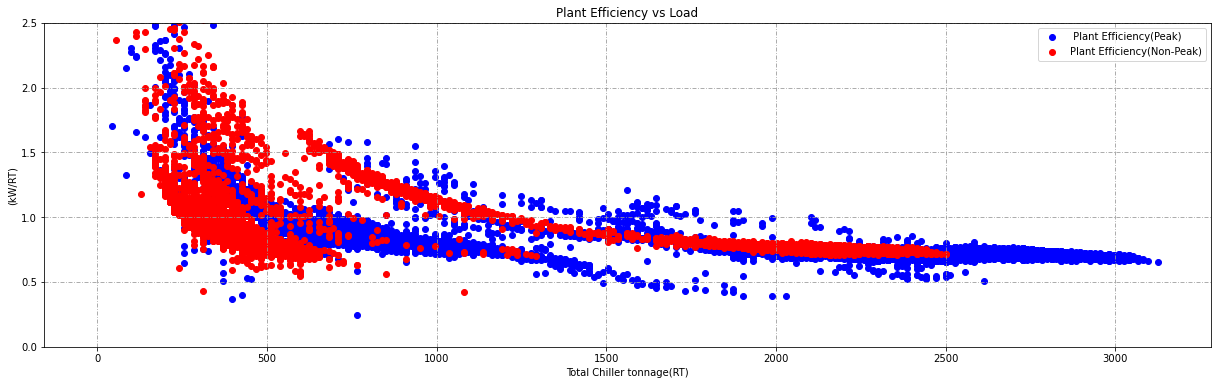

In [165]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Total Chiller tonnage(RT)')
axes_1.set_ylabel('(kW/RT)')
axes_1.set_ylim(bottom= 0, top= 2.5)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('Plant Efficiency vs Load')
axes_1.scatter(dfs_day['hdr_hgain'],dfs_day['sys_eff'], label =' Plant Efficiency(Peak)', color= 'blue')
axes_1.scatter(dfs_night['hdr_hgain'],dfs_night['sys_eff'], label ='Plant Efficiency(Non-Peak)', color= 'red')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

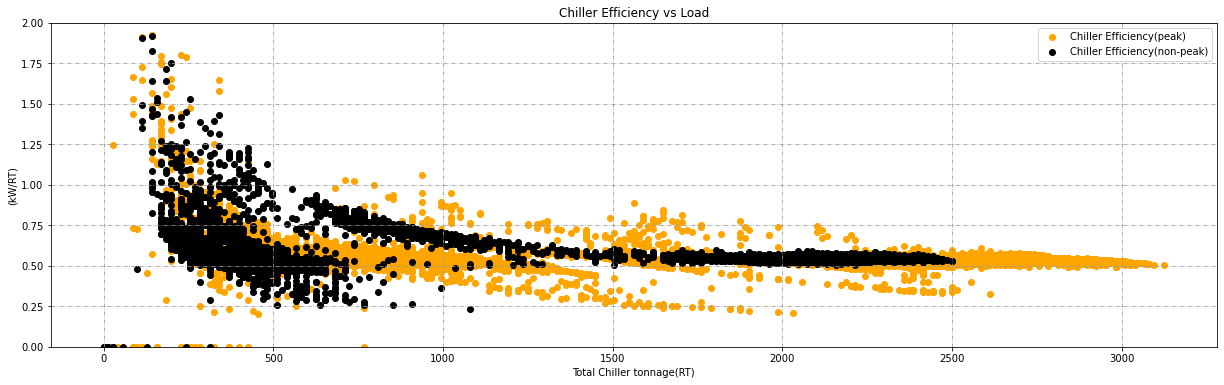

In [239]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Total Chiller tonnage(RT)')
axes_1.set_ylabel('(kW/RT)')
axes_1.set_ylim(bottom= 0, top= 2)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('Chiller Efficiency vs Load')
axes_1.scatter(dfs_day['hdr_hgain'],dfs_day['chiller eff'], label ='Chiller Efficiency(peak)', color= 'orange')
axes_1.scatter(dfs_night['hdr_hgain'],dfs_night['chiller eff'], label ='Chiller Efficiency(non-peak)', color= 'BLACK')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

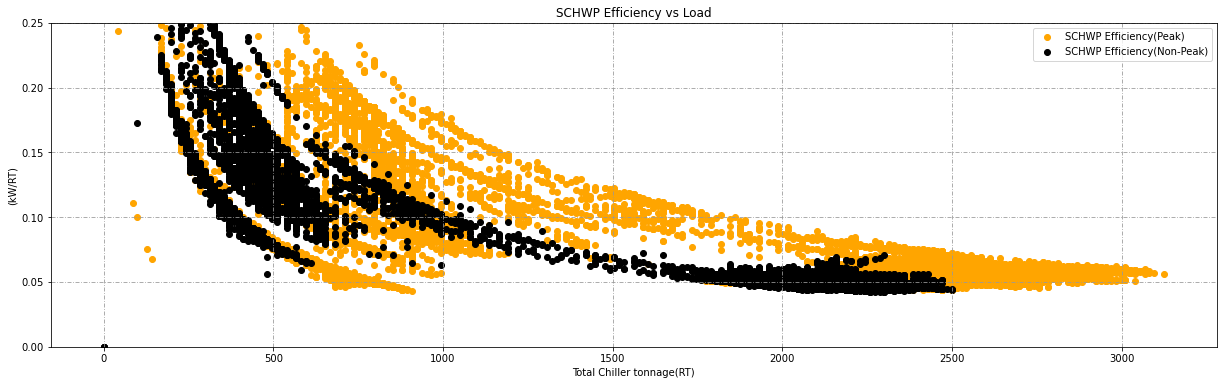

In [243]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Total Chiller tonnage(RT)')
axes_1.set_ylabel('(kW/RT)')
axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('SCHWP Efficiency vs Load')
axes_1.scatter(dfs_day['hdr_hgain'],dfs_day['schwp eff'], label ='SCHWP Efficiency(Peak)', color= 'orange')
axes_1.scatter(dfs_night['hdr_hgain'],dfs_night['schwp eff'], label ='SCHWP Efficiency(Non-Peak)', color= 'black')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

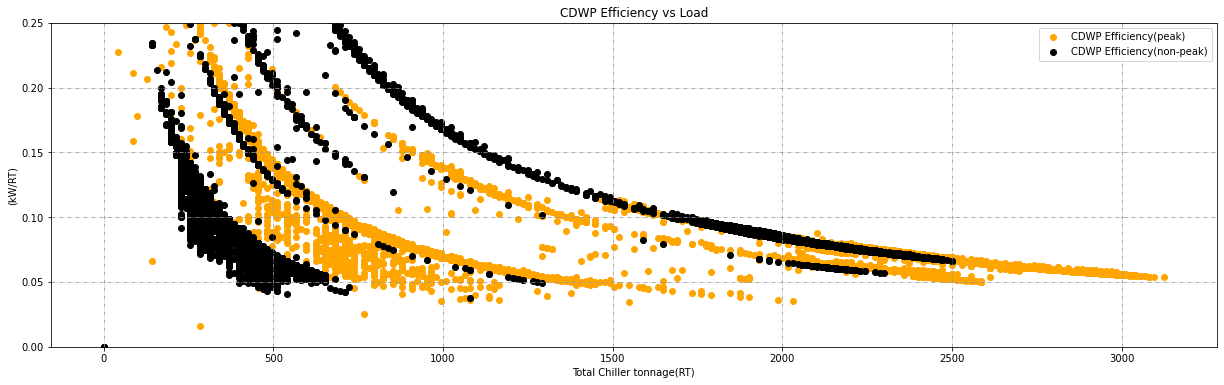

In [244]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Total Chiller tonnage(RT)')
axes_1.set_ylabel('(kW/RT)')
axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CDWP Efficiency vs Load')
axes_1.scatter(dfs_day['hdr_hgain'],dfs_day['cdwp eff'], label ='CDWP Efficiency(peak)', color= 'orange')
axes_1.scatter(dfs_night['hdr_hgain'],dfs_night['cdwp eff'], label ='CDWP Efficiency(non-peak)', color= 'black')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

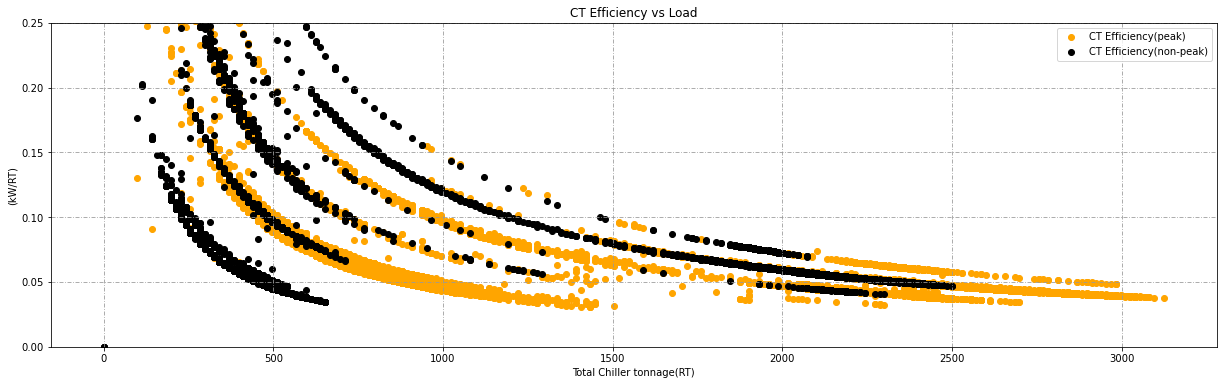

In [245]:
fig_1 =plt.figure(figsize=(18,5))
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Total Chiller tonnage(RT)')
axes_1.set_ylabel('(kW/RT)')
axes_1.set_ylim(bottom= 0, top= 0.25)
#axes_1.set_xlim(left= 0, right= 1.25)
axes_1.set_title('CT Efficiency vs Load')
axes_1.scatter(dfs_day['hdr_hgain'],dfs_day['ct eff'], label ='CT Efficiency(peak)', color= 'orange')
axes_1.scatter(dfs_night['hdr_hgain'],dfs_night['ct eff'], label ='CT Efficiency(non-peak)', color= 'black')
axes_1.legend(loc=0) 
axes_1.grid(True, color='0.6', dashes = (5,2,1,2))

In [72]:
dfsx.reset_index(inplace= True)

In [75]:
dfs_hour = dfsx.resample(rule='60Min', on='datetime').mean()


In [76]:
dfs_hour

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
datetime                                                               
2023-03-02 00:00:00          9.421250        12.793583    152.833456   
2023-03-02 01:00:00          8.395333        10.311083    165.416799   
2023-03-02 02:00:00          8.084250        10.835833     44.750036   
2023-03-02 03:00:00          7.976750        10.579083     38.916698   
2023-03-02 04:00:00          7.985917        10.447583     39.083365   
...                               ...              ...           ...   
2023-03-30 19:00:00          8.604083        13.792833    265.083545   
2023-03-30 20:00:00          8.580500        13.836833    261.916876   
2023-03-30 21:00:00          8.462500        12.852250    254.583537   
2023-03-30 22:00:00          8.502250        11.072583    111.166756   
2023-03-30 23:00:00          8.248167        10.911000    103.500083   

                       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp  \
datetime                                                              
2023-03-02 00:00:00   792.360058         28.783646        33.509686   
2023-03-02 01:00:00   482.090012         27.567209        29.557588   
2023-03-02 02:00:00   404.226683         27.076551        28.625436   
2023-03-02 03:00:00   369.673349         26.826180        28.201106   
2023-03-02 04:00:00   347.190014         26.486747        27.729503   
...                          ...               ...              ...   
2023-03-30 19:00:00  2103.730065         29.235027        33.055157   
2023-03-30 20:00:00  2111.540107         29.782403        33.691513   
2023-03-30 21:00:00  1742.576745         28.849785        32.235245   
2023-03-30 22:00:00   446.590010         28.288272        31.183500   
2023-03-30 23:00:00   418.900008         29.135790        32.898390   

                          oa_t      oa_rh  riser1_chw_dpi  riser2_chw_dpi  \
datetime                                                                    
2023-03-02 00:00:00  23.833698  53.518746       20.304722        7.483254   
2023-03-02 01:00:00  23.758113  53.629555       22.613999        7.467544   
2023-03-02 02:00:00  23.536314  53.629555       12.183388        7.593292   
2023-03-02 03:00:00  23.208348  53.629555       11.371435        7.583079   
2023-03-02 04:00:00  23.040623  53.497848       11.371435        6.824471   
...                        ...        ...             ...             ...   
2023-03-30 19:00:00  30.140330  53.903108       56.835424        7.592057   
2023-03-30 20:00:00  28.651632  53.645813       56.077580        7.622888   
2023-03-30 21:00:00  27.849379  53.465515       58.711257        7.635351   
2023-03-30 22:00:00  27.733818  53.226605       19.261866        8.216180   
2023-03-30 23:00:00  27.401350  53.124585       11.471786        7.636390   

                     riser3_chw_dpi  riser1_chw_flow  riser1_chw_supptemp  \
datetime                                                                    
2023-03-02 00:00:00      114.514564       149.782527             9.389166   
2023-03-02 01:00:00      135.682559       161.324203             8.326416   
2023-03-02 02:00:00      229.127682        43.212998             8.069666   
2023-03-02 03:00:00      242.405913        36.666696             7.909250   
2023-03-02 04:00:00      249.202737        37.125030             7.898667   
...                             ...              ...                  ...   
2023-03-30 19:00:00      269.804811       258.333540             8.544666   
2023-03-30 20:00:00      278.503218       255.333538             8.512333   
2023-03-30 21:00:00      276.845438       248.819644             8.397500   
2023-03-30 22:00:00      165.619261       108.097309             8.441583   
2023-03-30 23:00:00       81.313996       101.240822             8.193000   

                     riser1_chw_rettemp  riser2_chw_flow  riser2_chw_supptemp  \
datetime                                                                   

In [80]:
dfs_peak = dfs_hour.between_time('07:00','18:00')
dfs_peak

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
datetime                                                               
2023-03-02 07:00:00          9.221500        11.388250      0.000000   
2023-03-02 08:00:00          8.870417        11.748500     39.500032   
2023-03-02 09:00:00          8.929483        11.859741    161.551853   
2023-03-02 10:00:00          9.991167        14.509500    274.916887   
2023-03-02 11:00:00          8.580916        13.110166    264.166878   
...                               ...              ...           ...   
2023-03-30 14:00:00          8.626500        13.524500    265.000212   
2023-03-30 15:00:00          8.545916        13.565916    267.916881   
2023-03-30 16:00:00          8.602583        13.523666    263.250211   
2023-03-30 17:00:00          8.579583        13.429250    263.083544   
2023-03-30 18:00:00          8.602000        13.552916    271.500217   

                       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp  \
datetime                                                              
2023-03-02 07:00:00   496.526698         26.582132        28.294497   
2023-03-02 08:00:00   647.046684         27.306862        29.870309   
2023-03-02 09:00:00   797.403472         27.632875        30.605010   
2023-03-02 10:00:00  2277.206752         28.915513        33.199723   
2023-03-02 11:00:00  2284.780031         28.728072        32.506001   
...                          ...               ...              ...   
2023-03-30 14:00:00  2575.406857         30.137801        34.803033   
2023-03-30 15:00:00  2639.780068         30.601193        35.415978   
2023-03-30 16:00:00  2584.163454         30.343736        35.051675   
2023-03-30 17:00:00  2521.683468         29.636383        34.283597   
2023-03-30 18:00:00  2098.760098         28.220899        32.098414   

                          oa_t      oa_rh  riser1_chw_dpi  riser2_chw_dpi  \
datetime                                                                    
2023-03-02 07:00:00  23.127084  53.480453       11.371233      175.399913   
2023-03-02 08:00:00  24.003650  53.659911       11.420197      141.839831   
2023-03-02 09:00:00  25.226007  53.960818       20.646363       15.507124   
2023-03-02 10:00:00  26.519329  54.256895       59.636402       95.465589   
2023-03-02 11:00:00  29.246340  54.780305       61.277246      146.648867   
...                        ...        ...             ...             ...   
2023-03-30 14:00:00  32.575765  54.205347       55.327322      104.603207   
2023-03-30 15:00:00  32.341646  54.128420       55.492518      114.380222   
2023-03-30 16:00:00  32.082738  54.108910       55.081753      116.785072   
2023-03-30 17:00:00  30.634252  53.794091       55.360924      126.374511   
2023-03-30 18:00:00  30.486309  53.916633       62.342662       26.116880   

                     riser3_chw_dpi  riser1_chw_flow  riser1_chw_supptemp  \
datetime                                                                    
2023-03-02 07:00:00      252.961087         0.000000             8.232083   
2023-03-02 08:00:00      302.160550        37.583363             8.363666   
2023-03-02 09:00:00      218.243589       157.184034             8.831379   
2023-03-02 10:00:00      301.258174       266.027991             9.967083   
2023-03-02 11:00:00      323.589708       258.132151             8.522250   
...                             ...              ...                  ...   
2023-03-30 14:00:00      318.834004       259.176133             8.566750   
2023-03-30 15:00:00      322.893110       260.041875             8.488250   
2023-03-30 16:00:00      327.169616       257.000206             8.540916   
2023-03-30 17:00:00      327.864115       256.426131             8.505750   
2023-03-30 18:00:00      263.472913       266.000213             8.529333   

                     riser1_chw_rettemp  riser2_chw_flow  riser2_chw_supptemp  \
datetime                                                                   

In [82]:
dfs_peak['Total Plant Power'].sum()

510704.2947739181

In [83]:
dfs_peak['hdr_hgain'].sum()

681847.8925267559

In [84]:
dfs_peak['saving (kW)'].sum()

24260.888674984268

In [85]:
dfs_peak['hdr_ch_kw'].sum()

367728.3969083703

In [86]:
dfs_peak['auxiliary equipment power(with vsd)_1'] = dfs_peak['ct_total_kw'] + dfs_peak['hdr_cdwp_kw'] + dfs_peak['hdr_schwp_kw']

C:\Users\Mhm Farid Kamarul B\AppData\Local\Temp\ipykernel_15692\92991793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_peak['auxiliary equipment power(with vsd)_1'] = dfs_peak['ct_total_kw'] + dfs_peak['hdr_cdwp_kw'] + dfs_peak['hdr_schwp_kw']


In [87]:
dfs_peak['auxiliary equipment power(with vsd)_1'].sum()

126530.65616630233

In [81]:
dfs_nonpeak = dfs_hour.between_time('19:00','06:00')
dfs_nonpeak

hdr_chw_supptemp  hdr_chw_rettemp  hdr_chw_flow  \
datetime                                                               
2023-03-02 00:00:00          9.421250        12.793583    152.833456   
2023-03-02 01:00:00          8.395333        10.311083    165.416799   
2023-03-02 02:00:00          8.084250        10.835833     44.750036   
2023-03-02 03:00:00          7.976750        10.579083     38.916698   
2023-03-02 04:00:00          7.985917        10.447583     39.083365   
...                               ...              ...           ...   
2023-03-30 19:00:00          8.604083        13.792833    265.083545   
2023-03-30 20:00:00          8.580500        13.836833    261.916876   
2023-03-30 21:00:00          8.462500        12.852250    254.583537   
2023-03-30 22:00:00          8.502250        11.072583    111.166756   
2023-03-30 23:00:00          8.248167        10.911000    103.500083   

                       hdr_hgain  hdr_cdw_supptemp  hdr_cdw_rettemp  \
datetime                                                              
2023-03-02 00:00:00   792.360058         28.783646        33.509686   
2023-03-02 01:00:00   482.090012         27.567209        29.557588   
2023-03-02 02:00:00   404.226683         27.076551        28.625436   
2023-03-02 03:00:00   369.673349         26.826180        28.201106   
2023-03-02 04:00:00   347.190014         26.486747        27.729503   
...                          ...               ...              ...   
2023-03-30 19:00:00  2103.730065         29.235027        33.055157   
2023-03-30 20:00:00  2111.540107         29.782403        33.691513   
2023-03-30 21:00:00  1742.576745         28.849785        32.235245   
2023-03-30 22:00:00   446.590010         28.288272        31.183500   
2023-03-30 23:00:00   418.900008         29.135790        32.898390   

                          oa_t      oa_rh  riser1_chw_dpi  riser2_chw_dpi  \
datetime                                                                    
2023-03-02 00:00:00  23.833698  53.518746       20.304722        7.483254   
2023-03-02 01:00:00  23.758113  53.629555       22.613999        7.467544   
2023-03-02 02:00:00  23.536314  53.629555       12.183388        7.593292   
2023-03-02 03:00:00  23.208348  53.629555       11.371435        7.583079   
2023-03-02 04:00:00  23.040623  53.497848       11.371435        6.824471   
...                        ...        ...             ...             ...   
2023-03-30 19:00:00  30.140330  53.903108       56.835424        7.592057   
2023-03-30 20:00:00  28.651632  53.645813       56.077580        7.622888   
2023-03-30 21:00:00  27.849379  53.465515       58.711257        7.635351   
2023-03-30 22:00:00  27.733818  53.226605       19.261866        8.216180   
2023-03-30 23:00:00  27.401350  53.124585       11.471786        7.636390   

                     riser3_chw_dpi  riser1_chw_flow  riser1_chw_supptemp  \
datetime                                                                    
2023-03-02 00:00:00      114.514564       149.782527             9.389166   
2023-03-02 01:00:00      135.682559       161.324203             8.326416   
2023-03-02 02:00:00      229.127682        43.212998             8.069666   
2023-03-02 03:00:00      242.405913        36.666696             7.909250   
2023-03-02 04:00:00      249.202737        37.125030             7.898667   
...                             ...              ...                  ...   
2023-03-30 19:00:00      269.804811       258.333540             8.544666   
2023-03-30 20:00:00      278.503218       255.333538             8.512333   
2023-03-30 21:00:00      276.845438       248.819644             8.397500   
2023-03-30 22:00:00      165.619261       108.097309             8.441583   
2023-03-30 23:00:00       81.313996       101.240822             8.193000   

                     riser1_chw_rettemp  riser2_chw_flow  riser2_chw_supptemp  \
datetime                                                                   

In [88]:
dfs_nonpeak['Total Plant Power'].sum()

221491.51342000382

In [89]:
dfs_nonpeak['hdr_hgain'].sum()

263107.12374567986

In [90]:
dfs_nonpeak['saving (kW)'].sum()

26448.404749422883

In [91]:
dfs_nonpeak['hdr_ch_kw'].sum()

147514.98918369634

In [92]:
dfs_nonpeak['auxiliary equipment power(with vsd)_1'] = dfs_nonpeak['ct_total_kw'] + dfs_nonpeak['hdr_cdwp_kw'] + dfs_nonpeak['hdr_schwp_kw']

C:\Users\Mhm Farid Kamarul B\AppData\Local\Temp\ipykernel_15692\905712886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_nonpeak['auxiliary equipment power(with vsd)_1'] = dfs_nonpeak['ct_total_kw'] + dfs_nonpeak['hdr_cdwp_kw'] + dfs_nonpeak['hdr_schwp_kw']


In [93]:
dfs_nonpeak['auxiliary equipment power(with vsd)_1'].sum()

65917.6916497702